<center>
    <h1>Loan Default Prediction</h1>
</center>                                



### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

### Load DataSet

In [2]:
data = pd.read_csv("C:\\Users\\per\\Desktop\\XYZCorp_LendingData.txt", delimiter='\t', parse_dates = ['issue_d'], low_memory=False)

In [3]:
data.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599     5000.0       5000.0           4975.0   36 months   
1  1077430    1314167     2500.0       2500.0           2500.0   60 months   
2  1077175    1313524     2400.0       2400.0           2400.0   36 months   
3  1076863    1277178    10000.0      10000.0          10000.0   36 months   
4  1075358    1311748     3000.0       3000.0           3000.0   60 months   

   int_rate  installment grade sub_grade  ... il_util open_rv_12m open_rv_24m  \
0     10.65       162.87     B        B2  ...     NaN         NaN         NaN   
1     15.27        59.83     C        C4  ...     NaN         NaN         NaN   
2     15.96        84.33     C        C5  ...     NaN         NaN         NaN   
3     13.49       339.31     C        C1  ...     NaN         NaN         NaN   
4     12.69        67.79     B        B5  ...     NaN         NaN         NaN   

   max_bal_bc all_util total_rev_hi_lim inq_fi total_cu_tl inq_last_12m  \
0         NaN      NaN              NaN    NaN         NaN          NaN   
1         NaN      NaN              NaN    NaN         NaN          NaN   
2         NaN      NaN              NaN    NaN         NaN          NaN   
3         NaN      NaN              NaN    NaN         NaN          NaN   
4         NaN      NaN              NaN    NaN         NaN          NaN   

  default_ind  
0           0  
1           1  
2           0  
3           0  
4           0  

[5 rows x 73 columns]

In [4]:
# number of observations and features
data.shape

(855969, 73)

### Counts of Non Null Values for each column in Dataframe

In [5]:
#data types in the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 73 columns):
id                             855969 non-null int64
member_id                      855969 non-null int64
loan_amnt                      855969 non-null float64
funded_amnt                    855969 non-null float64
funded_amnt_inv                855969 non-null float64
term                           855969 non-null object
int_rate                       855969 non-null float64
installment                    855969 non-null float64
grade                          855969 non-null object
sub_grade                      855969 non-null object
emp_title                      806526 non-null object
emp_length                     812908 non-null object
home_ownership                 855969 non-null object
annual_inc                     855969 non-null float64
verification_status            855969 non-null object
issue_d                        855969 non-null datetime64[ns]
pymnt_plan   

In [6]:
# Descriptive Statistics
data.describe()

id     member_id      loan_amnt    funded_amnt  \
count  8.559690e+05  8.559690e+05  855969.000000  855969.000000   
mean   3.224073e+07  3.476269e+07   14745.571335   14732.378305   
std    2.271969e+07  2.399418e+07    8425.340005    8419.471653   
min    5.473400e+04  7.069900e+04     500.000000     500.000000   
25%    9.067986e+06  1.079273e+07    8000.000000    8000.000000   
50%    3.431355e+07  3.697532e+07   13000.000000   13000.000000   
75%    5.446311e+07  5.803559e+07   20000.000000   20000.000000   
max    6.861687e+07  7.351969e+07   35000.000000   35000.000000   

       funded_amnt_inv       int_rate    installment    annual_inc  \
count    855969.000000  855969.000000  855969.000000  8.559690e+05   
mean      14700.061226      13.192320     436.238072  7.507119e+04   
std        8425.805478       4.368365     243.726876  6.426447e+04   
min           0.000000       5.320000      15.690000  0.000000e+00   
25%        8000.000000       9.990000     260.550000  4.500000e+04   
50%       13000.000000      12.990000     382.550000  6.500000e+04   
75%       20000.000000      15.990000     571.560000  9.000000e+04   
max       35000.000000      28.990000    1445.460000  9.500000e+06   

                 dti    delinq_2yrs  ...       il_util   open_rv_12m  \
count  855969.000000  855969.000000  ...  11609.000000  13288.000000   
mean       18.122165       0.311621  ...     71.486993      1.354305   
std        17.423629       0.857189  ...     23.015293      1.483710   
min         0.000000       0.000000  ...      0.000000      0.000000   
25%        11.880000       0.000000  ...     58.500000      0.000000   
50%        17.610000       0.000000  ...     75.000000      1.000000   
75%        23.900000       0.000000  ...     87.500000      2.000000   
max      9999.000000      39.000000  ...    223.300000     22.000000   

        open_rv_24m    max_bal_bc      all_util  total_rev_hi_lim  \
count  13288.000000  13288.000000  13288.000000      7.886560e+05   
mean       2.945515   5840.443332     61.024526      3.216357e+04   
std        2.595313   5108.500262     20.018117      3.769964e+04   
min        0.000000      0.000000      0.000000      0.000000e+00   
25%        1.000000   2405.000000     47.900000      1.400000e+04   
50%        2.000000   4485.500000     62.100000      2.380000e+04   
75%        4.000000   7701.250000     75.300000      3.990000e+04   
max       43.000000  83047.000000    151.400000      9.999999e+06   

             inq_fi   total_cu_tl  inq_last_12m    default_ind  
count  13288.000000  13288.000000  13288.000000  855969.000000  
mean       0.947772      1.524232      1.841963       0.054286  
std        1.441667      2.697601      2.975049       0.226581  
min        0.000000      0.000000     -4.000000       0.000000  
25%        0.000000      0.000000      0.000000       0.000000  
50%        0.000000      0.000000      2.000000       0.000000  
75%        1.000000      2.000000      3.000000       0.000000  
max       15.000000     33.000000     32.000000       1.000000  

[8 rows x 52 columns]

### NULL Values for each column

In [7]:
data.isnull().sum()

id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       49443
emp_length                      43061
home_ownership                      0
annual_inc                          0
verification_status                 0
issue_d                             0
pymnt_plan                          0
desc                           734157
purpose                             0
title                              33
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                         0
earliest_cr_line                    0
inq_last_6mths                      0
mths_since_l

In [8]:
data.dtypes.value_counts()

float64           49
object            20
int64              3
datetime64[ns]     1
dtype: int64

### Number of columns distributed by Data Types

Text(0, 0.5, 'Data type')

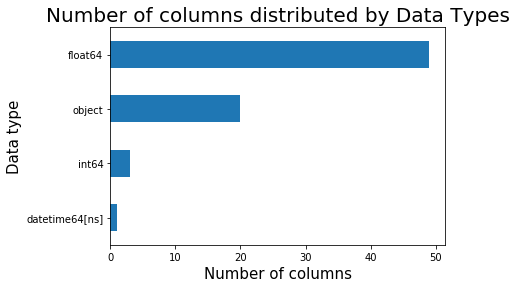

In [9]:
# Number of each type of column
data.dtypes.value_counts().sort_values().plot(kind='barh')
plt.title('Number of columns distributed by Data Types',fontsize=20)
plt.xlabel('Number of columns',fontsize=15)
plt.ylabel('Data type',fontsize=15)

### Finding Categorical Data and Numerical Data

In [10]:
# finding categorical data and numerical data

categorical_list = []
numerical_list = []
for i in data.columns.tolist():
    if data[i].dtype=='object':
        categorical_list.append(i)
    else:
        numerical_list.append(i)
print('Number of categorical features:', str(len(categorical_list)))
print('Number of categorical features are:', (categorical_list))
print('Number of numerical features:', str(len(numerical_list)))


Number of categorical features: 20
Number of categorical features are: ['term', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line', 'initial_list_status', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'application_type', 'verification_status_joint']
Number of numerical features: 53


### Categorical Features unique values

In [11]:
# Categorical Features unique values
print(f'term: {data.term.unique()}')
print(f'grade: {data.grade.unique()}')
print(f'sub_grade: {data.sub_grade.unique()}')
print(f'emp_title: {data.emp_title.unique()}')
print(f'emp_length: {data.emp_length.unique()}')
print(f'home_ownership: {data.home_ownership.unique()}')
print(f'verification_status: {data.verification_status.unique()}')
print(f'pymnt_plan: {data.pymnt_plan.unique()}')
print(f'desc: {data.desc.unique()}')
print(f'purpose: {data.purpose.unique()}')
print(f'title: {data.title.unique()}')
print(f'zip_code: {data.zip_code.unique()}')
print(f'addr_state: {data.addr_state.unique()}')
print(f'earliest_cr_line: {data.earliest_cr_line.unique()}')
print(f'initial_list_status: {data.initial_list_status.unique()}')
print(f'last_pymnt_d: {data.last_pymnt_d.unique()}')
print(f'next_pymnt_d: {data.next_pymnt_d.unique()}')
print(f'last_credit_pull_d: {data.last_credit_pull_d.unique()}')
print(f'application_type: {data.application_type.unique()}')
print(f'verification_status_joint: {data.verification_status_joint.unique()}')

term: [' 36 months' ' 60 months']
grade: ['B' 'C' 'A' 'E' 'F' 'D' 'G']
sub_grade: ['B2' 'C4' 'C5' 'C1' 'B5' 'A4' 'E1' 'F2' 'C3' 'B1' 'D1' 'A1' 'B3' 'B4'
 'C2' 'D2' 'A3' 'A5' 'D5' 'A2' 'E4' 'D3' 'D4' 'F3' 'E3' 'F4' 'F1' 'E5'
 'G4' 'E2' 'G3' 'G2' 'G1' 'F5' 'G5']
emp_title: [nan 'Ryder' 'AIR RESOURCES BOARD' ... 'machining Cell Lead'
 'KYC Business Analyst' 'Manager Hotel Operations Oasis ']
emp_length: ['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' nan]
home_ownership: ['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE' 'ANY']
verification_status: ['Verified' 'Source Verified' 'Not Verified']
pymnt_plan: ['n' 'y']
desc: ['  Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>'
 '  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good

# Pre Processing the Data
- Missing Values Treatment - Numerical (Mean/Median imputation) and Categorical (Separate Missing Category or Merging)
 - Univariate Analysis - Outlier and Frequency Analysis

#### Finding out the percentage of missing values in each Columns

In [12]:
# MVT Missing Value Treatment
miss_val=data.isnull().sum()
print(miss_val)
miss_per= 100*data.isnull().sum()/len(data)
print(miss_per)

id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       49443
emp_length                      43061
home_ownership                      0
annual_inc                          0
verification_status                 0
issue_d                             0
pymnt_plan                          0
desc                           734157
purpose                             0
title                              33
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                         0
earliest_cr_line                    0
inq_last_6mths                      0
mths_since_l

##### visualization of missing values by each features


(73, 2)

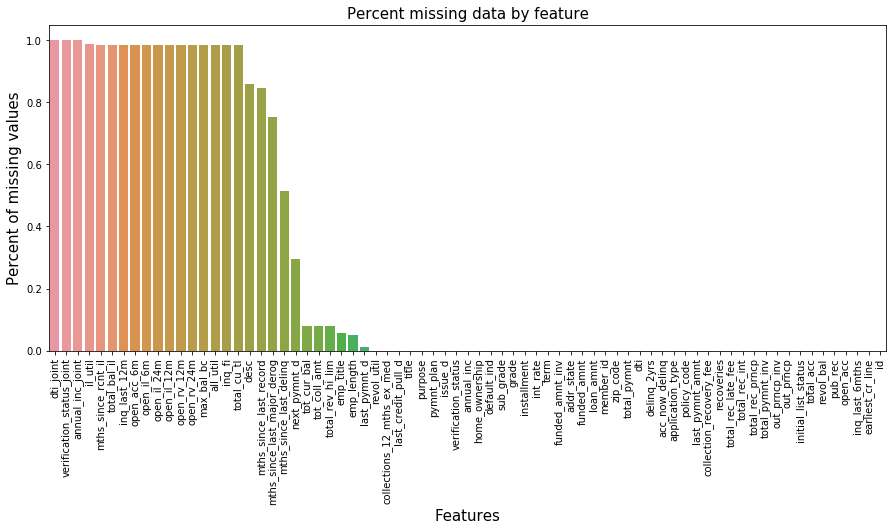

In [13]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending= False) 
missing_data = pd.concat([total, percent], axis = 1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data.shape

In [14]:
missing_data

Total   Percent
dti_joint                    855529  0.999486
verification_status_joint    855527  0.999484
annual_inc_joint             855527  0.999484
il_util                      844360  0.986438
mths_since_rcnt_il           843035  0.984890
total_bal_il                 842681  0.984476
inq_last_12m                 842681  0.984476
open_acc_6m                  842681  0.984476
open_il_6m                   842681  0.984476
open_il_24m                  842681  0.984476
open_il_12m                  842681  0.984476
open_rv_12m                  842681  0.984476
open_rv_24m                  842681  0.984476
max_bal_bc                   842681  0.984476
all_util                     842681  0.984476
inq_fi                       842681  0.984476
total_cu_tl                  842681  0.984476
desc                         734157  0.857691
mths_since_last_record       724785  0.846742
mths_since_last_major_derog  642830  0.750997
mths_since_last_delinq       439812  0.513818
next_pymnt_d                 252971  0.295538
tot_cur_bal                   67313  0.078640
tot_coll_amt                  67313  0.078640
total_rev_hi_lim              67313  0.078640
emp_title                     49443  0.057763
emp_length                    43061  0.050307
last_pymnt_d                   8862  0.010353
revol_util                      446  0.000521
collections_12_mths_ex_med       56  0.000065
...                             ...       ...
term                              0  0.000000
funded_amnt_inv                   0  0.000000
addr_state                        0  0.000000
funded_amnt                       0  0.000000
loan_amnt                         0  0.000000
member_id                         0  0.000000
zip_code                          0  0.000000
total_pymnt                       0  0.000000
dti                               0  0.000000
delinq_2yrs                       0  0.000000
acc_now_delinq                    0  0.000000
application_type                  0  0.000000
policy_code                       0  0.000000
last_pymnt_amnt                   0  0.000000
collection_recovery_fee           0  0.000000
recoveries                        0  0.000000
total_rec_late_fee                0  0.000000
total_rec_int                     0  0.000000
total_rec_prncp                   0  0.000000
total_pymnt_inv                   0  0.000000
out_prncp_inv                     0  0.000000
out_prncp                         0  0.000000
initial_list_status               0  0.000000
total_acc                         0  0.000000
revol_bal                         0  0.000000
pub_rec                           0  0.000000
open_acc                          0  0.000000
inq_last_6mths                    0  0.000000
earliest_cr_line                  0  0.000000
id                                0  0.000000

[73 rows x 2 columns]

In [15]:
 a=missing_data.iloc[:,1]!=0

In [16]:
a.head()

dti_joint                    True
verification_status_joint    True
annual_inc_joint             True
il_util                      True
mths_since_rcnt_il           True
Name: Percent, dtype: bool

In [17]:
a.tail()

pub_rec             False
open_acc            False
inq_last_6mths      False
earliest_cr_line    False
id                  False
Name: Percent, dtype: bool

### checking number of columns with  missing values

In [18]:
#check number of columns with  missing values
missing_values = missing_data[missing_data.iloc[:,1]!=0]
missing_values.shape

(32, 2)

In [19]:
missing_values.index

Index(['dti_joint', 'verification_status_joint', 'annual_inc_joint', 'il_util',
       'mths_since_rcnt_il', 'total_bal_il', 'inq_last_12m', 'open_acc_6m',
       'open_il_6m', 'open_il_24m', 'open_il_12m', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl',
       'desc', 'mths_since_last_record', 'mths_since_last_major_derog',
       'mths_since_last_delinq', 'next_pymnt_d', 'tot_cur_bal', 'tot_coll_amt',
       'total_rev_hi_lim', 'emp_title', 'emp_length', 'last_pymnt_d',
       'revol_util', 'collections_12_mths_ex_med', 'last_credit_pull_d',
       'title'],
      dtype='object')

In [20]:
t=missing_data[missing_data.iloc[:,1]!=0.0]
t.shape

(32, 2)

### Deleting Columns having Missing Values More Than 70%

In [21]:
#check the cut off values more than equal to 70 percent
missing_val_f = missing_values[missing_values.Percent >=0.7]
missing_val_f.shape
col = list(missing_val_f.index)
col

['dti_joint',
 'verification_status_joint',
 'annual_inc_joint',
 'il_util',
 'mths_since_rcnt_il',
 'total_bal_il',
 'inq_last_12m',
 'open_acc_6m',
 'open_il_6m',
 'open_il_24m',
 'open_il_12m',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'inq_fi',
 'total_cu_tl',
 'desc',
 'mths_since_last_record',
 'mths_since_last_major_derog']

### droping the missing values columns from dataset

In [22]:
#drop the missing values columns from dataset
ddf = data.drop(col,axis=1)
ddf.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599     5000.0       5000.0           4975.0   36 months   
1  1077430    1314167     2500.0       2500.0           2500.0   60 months   
2  1077175    1313524     2400.0       2400.0           2400.0   36 months   
3  1076863    1277178    10000.0      10000.0          10000.0   36 months   
4  1075358    1311748     3000.0       3000.0           3000.0   60 months   

   int_rate  installment grade sub_grade  ... next_pymnt_d last_credit_pull_d  \
0     10.65       162.87     B        B2  ...          NaN           Jan-2016   
1     15.27        59.83     C        C4  ...          NaN           Sep-2013   
2     15.96        84.33     C        C5  ...          NaN           Jan-2016   
3     13.49       339.31     C        C1  ...          NaN           Jan-2015   
4     12.69        67.79     B        B5  ...     Feb-2016           Jan-2016   

  collections_12_mths_ex_med  policy_code application_type acc_now_delinq  \
0                        0.0          1.0       INDIVIDUAL            0.0   
1                        0.0          1.0       INDIVIDUAL            0.0   
2                        0.0          1.0       INDIVIDUAL            0.0   
3                        0.0          1.0       INDIVIDUAL            0.0   
4                        0.0          1.0       INDIVIDUAL            0.0   

  tot_coll_amt tot_cur_bal total_rev_hi_lim default_ind  
0          NaN         NaN              NaN           0  
1          NaN         NaN              NaN           1  
2          NaN         NaN              NaN           0  
3          NaN         NaN              NaN           0  
4          NaN         NaN              NaN           0  

[5 rows x 53 columns]

In [23]:
#drop ID column from the data frame
data_f=ddf.drop('id',axis=1)
data_f.head()


member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  \
0    1296599     5000.0       5000.0           4975.0   36 months     10.65   
1    1314167     2500.0       2500.0           2500.0   60 months     15.27   
2    1313524     2400.0       2400.0           2400.0   36 months     15.96   
3    1277178    10000.0      10000.0          10000.0   36 months     13.49   
4    1311748     3000.0       3000.0           3000.0   60 months     12.69   

   installment grade sub_grade                 emp_title  ... next_pymnt_d  \
0       162.87     B        B2                       NaN  ...          NaN   
1        59.83     C        C4                     Ryder  ...          NaN   
2        84.33     C        C5                       NaN  ...          NaN   
3       339.31     C        C1       AIR RESOURCES BOARD  ...          NaN   
4        67.79     B        B5  University Medical Group  ...     Feb-2016   

  last_credit_pull_d  collections_12_mths_ex_med policy_code application_type  \
0           Jan-2016                         0.0         1.0       INDIVIDUAL   
1           Sep-2013                         0.0         1.0       INDIVIDUAL   
2           Jan-2016                         0.0         1.0       INDIVIDUAL   
3           Jan-2015                         0.0         1.0       INDIVIDUAL   
4           Jan-2016                         0.0         1.0       INDIVIDUAL   

  acc_now_delinq tot_coll_amt tot_cur_bal total_rev_hi_lim default_ind  
0            0.0          NaN         NaN              NaN           0  
1            0.0          NaN         NaN              NaN           1  
2            0.0          NaN         NaN              NaN           0  
3            0.0          NaN         NaN              NaN           0  
4            0.0          NaN         NaN              NaN           0  

[5 rows x 52 columns]

In [24]:
print(data_f.dtypes.value_counts())


float64           31
object            18
int64              2
datetime64[ns]     1
dtype: int64


In [26]:
#data_f.to_csv("E:\\python backup\\missing_values.csv", index = False)

In [2]:
#data_f = pd.read_csv("E:\\python backup\\missing_values.csv", parse_dates = ['issue_d'])

## Treating Categorical unique Variables

In [25]:
data_f.select_dtypes('object').apply(pd.Series.nunique, axis = 0)


term                        2
grade                       7
sub_grade                  35
emp_title              290912
emp_length                 11
home_ownership              6
verification_status         3
pymnt_plan                  2
purpose                    14
title                   60991
zip_code                  931
addr_state                 51
earliest_cr_line          697
initial_list_status         2
last_pymnt_d               97
next_pymnt_d                3
last_credit_pull_d        102
application_type            2
dtype: int64

In [26]:
to_drop = ['sub_grade','emp_title','title','zip_code',
           'addr_state','earliest_cr_line','last_pymnt_d','last_credit_pull_d']

In [27]:
data_f.drop(to_drop,axis=1,inplace=True)

### Finding categorical and numerical data

In [28]:
# Segregating the numerical and categorical variable names

numeric_var_names = [key for key in dict(data_f.dtypes) if dict(data_f.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
catgorical_var_names = [key for key in dict(data_f.dtypes) if dict(data_f.dtypes)[key] in ['object']]


In [29]:
catgorical_var_names

['term',
 'grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'pymnt_plan',
 'purpose',
 'initial_list_status',
 'next_pymnt_d',
 'application_type']

# Exploratory Data Analysis

# Univariate Analysis

#### Dependent variable ("default_ind")

0    809502
1     46467
Name: default_ind, dtype: int64


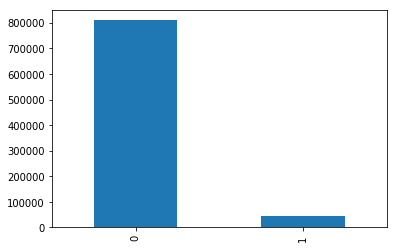

In [30]:
# Dependent variable Analysis
default_ind_count = data_f['default_ind'].value_counts()
print(default_ind_count)
default_ind_count.plot.bar()

In [31]:
default_ind_count.index

Int64Index([0, 1], dtype='int64')

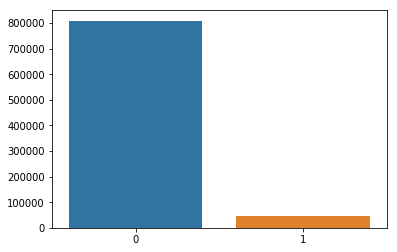

In [32]:
# Alternative way of plotting using Seaborn
sns.barplot(default_ind_count.index, default_ind_count.values)

# Term

 36 months    600221
 60 months    255748
Name: term, dtype: int64


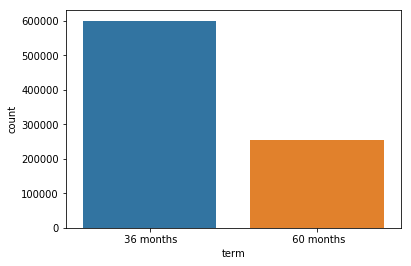

In [33]:
sns.countplot(x="term", data=data_f)

term_count = data_f['term'].value_counts()
print(term_count)
plt.show()

In [34]:
data_f['term'] = np.where(data_f['term']==' 36 months', 0, data_f['term'])
data_f['term'] = np.where(data_f['term']==' 60 months', 1, data_f['term'])

In [35]:
data_f['term'].value_counts()

0    600221
1    255748
Name: term, dtype: int64

In [36]:
data_f['term']=data_f['term'].astype(float)

# Grade

B    247998
C    236855
A    145665
D    132802
E     66448
F     21328
G      4873
Name: grade, dtype: int64


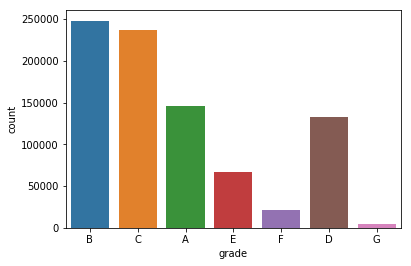

In [37]:
sns.countplot(x="grade", data=data_f)

grade_count = data_f['grade'].value_counts()
print(grade_count)
plt.show()

In [38]:
mapping_dict = {
"grade":{
"A": 1,
"B": 2,
"C": 3,
"D": 4,
"E": 5,
"F": 6,
"G": 7
}
}

data_f = data_f.replace(mapping_dict)
data_f[['grade']].head()

grade
0      2
1      3
2      3
3      3
4      2

In [39]:
data_f['grade'].value_counts()

2    247998
3    236855
1    145665
4    132802
5     66448
6     21328
7      4873
Name: grade, dtype: int64

In [40]:
data_f['grade']=data_f['grade'].astype(float)

# Purpose

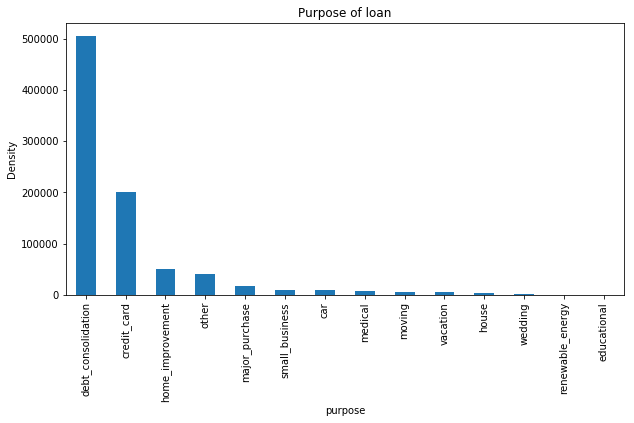

In [41]:
data_f.purpose.value_counts(ascending=False).plot.bar(figsize=(10,5))
plt.xlabel('purpose'); plt.ylabel('Density'); plt.title('Purpose of loan');

# Emp_length

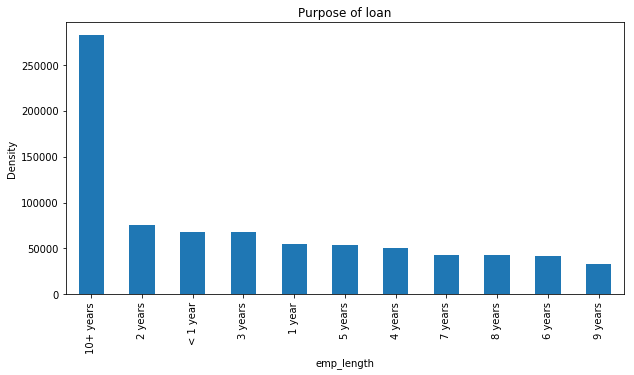

In [42]:

data_f.emp_length.value_counts(ascending=False).plot.bar(figsize=(10,5))

plt.xlabel('emp_length'); plt.ylabel('Density'); plt.title('Purpose of loan');

In [43]:
mapping_dict = {
"emp_length": {
"10+ years": 10,
"9 years": 9,
"8 years": 8,
"7 years": 7,
"6 years": 6,
"5 years": 5,
"4 years": 4,
"3 years": 3,
"2 years": 2,
"1 year": 1,
"< 1 year": 0.5,
"n/a": 0
}
}

data_f = data_f.replace(mapping_dict)
data_f[['emp_length']].head()

emp_length
0         10
1        0.5
2         10
3         10
4          1

In [44]:
data_f['emp_length'].value_counts()

10.0    282090
2.0      75986
0.5      67597
3.0      67392
1.0      54855
5.0      53812
4.0      50643
7.0      43204
8.0      42421
6.0      41446
9.0      33462
Name: emp_length, dtype: int64

In [45]:
data_f['emp_length']=data_f['emp_length'].astype(float)

# Home_Ownership

MORTGAGE    429106
RENT        342535
OWN          84136
OTHER          144
NONE            45
ANY              3
Name: home_ownership, dtype: int64


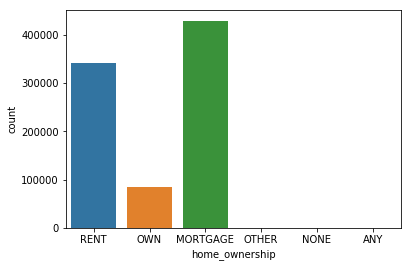

In [46]:
sns.countplot(x="home_ownership", data=data_f)
 
home_ownership_count = data_f['home_ownership'].value_counts()
print(home_ownership_count)
plt.show()

# pymnt_plan

n    855964
y         5
Name: pymnt_plan, dtype: int64


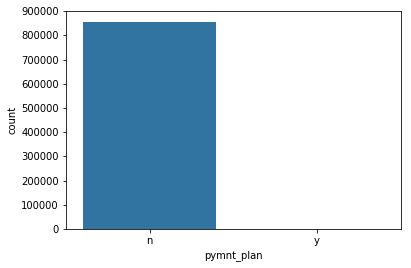

In [47]:
sns.countplot(x="pymnt_plan", data=data_f)
 
pymnt_plan_count = data_f['pymnt_plan'].value_counts()
print(pymnt_plan_count)
plt.show()

# initial_list_status

f    442555
w    413414
Name: initial_list_status, dtype: int64


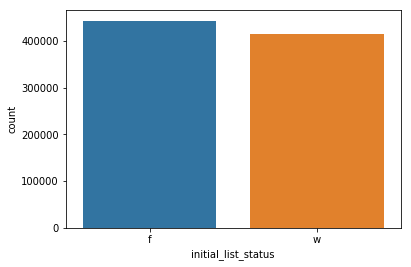

In [48]:
sns.countplot(x="initial_list_status", data=data_f)

initial_list_status_count = data_f['initial_list_status'].value_counts()
print(initial_list_status_count)
plt.show()

# next_pymnt_d

Feb-2016    534094
Jan-2016     68838
Mar-2016        66
Name: next_pymnt_d, dtype: int64


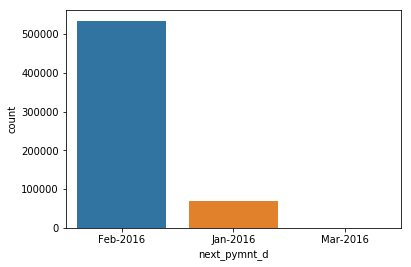

In [49]:
sns.countplot(x="next_pymnt_d", data=data_f)
next_pymnt_d_count = data_f['next_pymnt_d'].value_counts()
print(next_pymnt_d_count)
plt.show()


# application_type

INDIVIDUAL    855527
JOINT            442
Name: application_type, dtype: int64


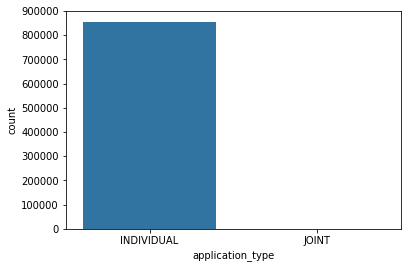

In [50]:
sns.countplot(x="application_type", data=data_f)

application_type_count = data_f['application_type'].value_counts()
print(application_type_count)
plt.show()

# verification_status

Source Verified    318178
Verified           280049
Not Verified       257742
Name: verification_status, dtype: int64


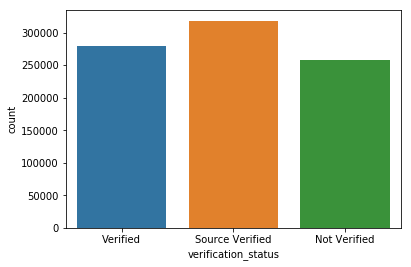

In [51]:
sns.countplot(x="verification_status", data=data_f)
verification_status_count = data_f['verification_status'].value_counts()
print(verification_status_count)
plt.show()

# Bivariate Analysis

## Categorical Independent Variable vs Target Variable

default_ind         0         1
term                           
0.0          0.950355  0.049645
1.0          0.934823  0.065177


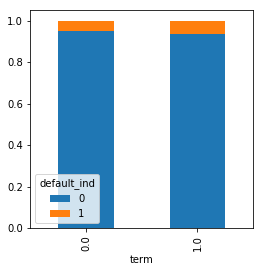

In [52]:
term_Loan = pd.crosstab(data_f['term'],data_f['default_ind'])
print(term_Loan.div(term_Loan.sum(axis=1).astype(float), axis=0))
term_Loan.div(term_Loan.sum(axis=1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

default_ind         0         1
grade                          
1.0          0.981711  0.018289
2.0          0.960818  0.039182
3.0          0.945106  0.054894
4.0          0.918691  0.081309
5.0          0.902796  0.097204
6.0          0.858730  0.141270
7.0          0.832957  0.167043


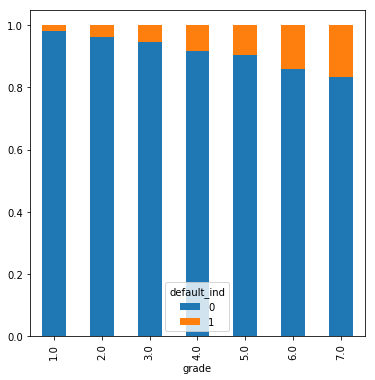

In [53]:
grade_Loan = pd.crosstab(data_f['grade'],data_f['default_ind'])
print(grade_Loan.div(grade_Loan.sum(axis=1).astype(float), axis=0))
grade_Loan.div(grade_Loan.sum(axis=1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,6))


default_ind                0         1
purpose                               
car                 0.946701  0.053299
credit_card         0.959734  0.040266
debt_consolidation  0.943828  0.056172
educational         0.828221  0.171779
home_improvement    0.953639  0.046361
house               0.916596  0.083404
major_purchase      0.946464  0.053536
medical             0.928720  0.071280
moving              0.915504  0.084496
other               0.926714  0.073286
renewable_energy    0.901639  0.098361
small_business      0.857946  0.142054
vacation            0.938793  0.061207
wedding             0.883772  0.116228


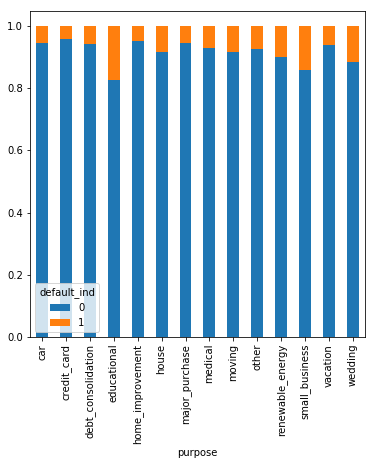

In [54]:
purpose_Loan = pd.crosstab(data_f['purpose'],data_f['default_ind'])
print(purpose_Loan.div(purpose_Loan.sum(axis=1).astype(float), axis=0))
purpose_Loan.div(purpose_Loan.sum(axis=1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,6))

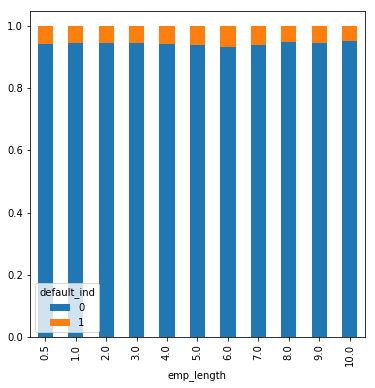

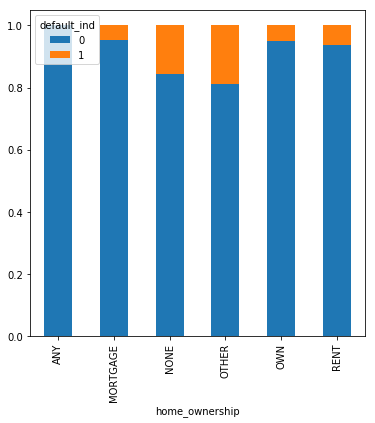

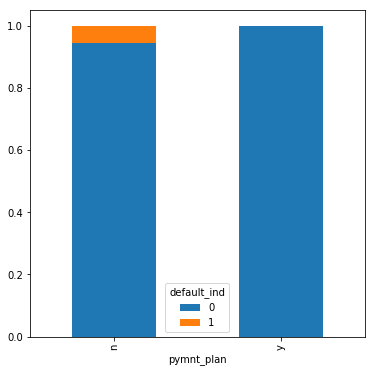

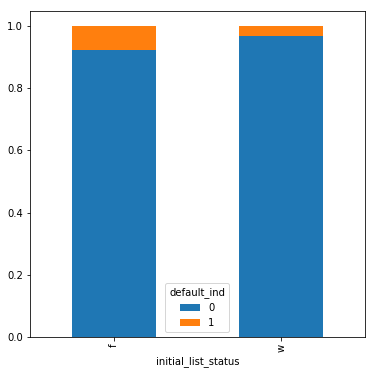

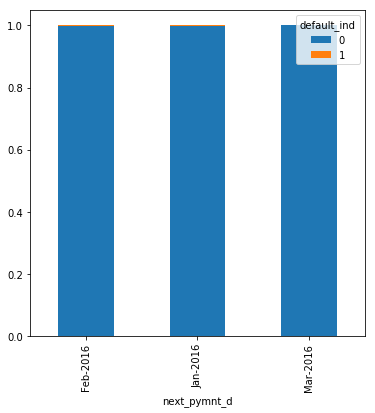

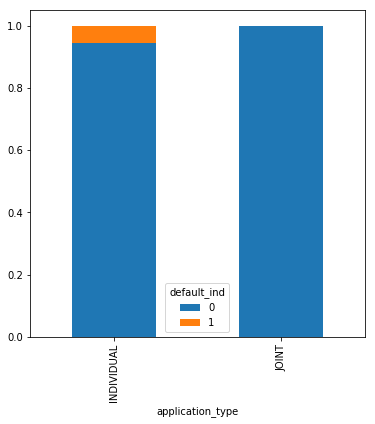

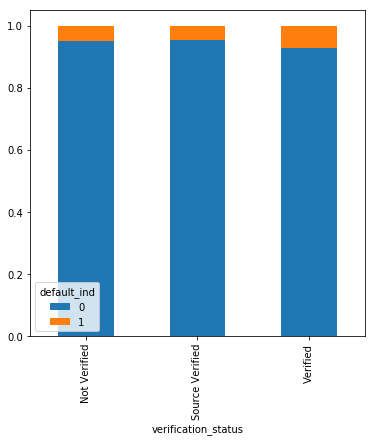

In [55]:
emp_length_Loan = pd.crosstab(data_f['emp_length'],data_f['default_ind'])
home_ownership_Loan = pd.crosstab(data_f['home_ownership'],data_f['default_ind'])
pymnt_plan_Loan = pd.crosstab(data_f['pymnt_plan'],data_f['default_ind'])
initial_list_status_Loan = pd.crosstab(data_f['initial_list_status'],data_f['default_ind'])
next_pymnt_d_Loan = pd.crosstab(data_f['next_pymnt_d'],data_f['default_ind'])
application_type_Loan = pd.crosstab(data_f['application_type'],data_f['default_ind'])
verification_status_Loan = pd.crosstab(data_f['verification_status'],data_f['default_ind'])


emp_length_Loan.div(emp_length_Loan.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,6))

home_ownership_Loan.div(home_ownership_Loan.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,6))

pymnt_plan_Loan.div(pymnt_plan_Loan.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,6))

initial_list_status_Loan.div(initial_list_status_Loan.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,6))

next_pymnt_d_Loan.div(next_pymnt_d_Loan.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,6))

application_type_Loan.div(application_type_Loan.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,6))

verification_status_Loan.div(verification_status_Loan.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,6))


plt.show()

### heat map for multi collinearity

In [56]:
%matplotlib inline
plt.style.use("fivethirtyeight")
sns.set_context("notebook")
plt.figure(figsize=(20,20)) 
sns.set_context("paper", font_scale=1.2)

<Figure size 1440x1440 with 0 Axes>

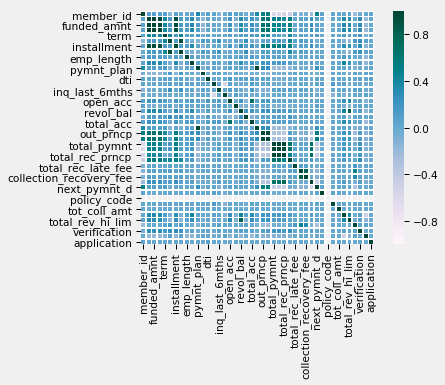

In [57]:
sns.heatmap(data_f.assign(grade=data_f.grade.astype('category').cat.codes, 
                         term=data_f.term.astype('category').cat.codes, 
                         verification=data_f.verification_status.astype('category').cat.codes, 
                         emp_length=data_f.emp_length.astype('category').cat.codes, 
                          home=data_f.home_ownership.astype('category').cat.codes, 
                         purpose=data_f.purpose.astype('category').cat.codes,
                            next_pymnt_d=data_f.next_pymnt_d.astype('category').cat.codes,
                            application=data_f.application_type.astype('category').cat.codes,
                            initial_list_status=data_f.initial_list_status.astype('category').cat.codes,
                            pymnt_plan=data_f.initial_list_status.astype('category').cat.codes).corr(),
             annot=False, cmap='PuBuGn', vmin=-1, vmax=1, square=True, linewidths=0.5)
#plt.show()

## Convert A Categorical Variable Into Dummy Variables


In [58]:
nominal_columns = ["home_ownership", "verification_status", "purpose", "application_type", "next_pymnt_d", "initial_list_status", "pymnt_plan"]
dummy_df = pd.get_dummies(data_f[nominal_columns])
data_f = pd.concat([data_f, dummy_df], axis=1)
data_f = data_f.drop(nominal_columns, axis=1)

In [59]:
data_f.head()


member_id  loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  \
0    1296599     5000.0       5000.0           4975.0   0.0     10.65   
1    1314167     2500.0       2500.0           2500.0   1.0     15.27   
2    1313524     2400.0       2400.0           2400.0   0.0     15.96   
3    1277178    10000.0      10000.0          10000.0   0.0     13.49   
4    1311748     3000.0       3000.0           3000.0   1.0     12.69   

   installment  grade  emp_length  annual_inc  ... purpose_wedding  \
0       162.87    2.0        10.0     24000.0  ...               0   
1        59.83    3.0         0.5     30000.0  ...               0   
2        84.33    3.0        10.0     12252.0  ...               0   
3       339.31    3.0        10.0     49200.0  ...               0   
4        67.79    2.0         1.0     80000.0  ...               0   

   application_type_INDIVIDUAL  application_type_JOINT  next_pymnt_d_Feb-2016  \
0                            1                       0                      0   
1                            1                       0                      0   
2                            1                       0                      0   
3                            1                       0                      0   
4                            1                       0                      1   

   next_pymnt_d_Jan-2016  next_pymnt_d_Mar-2016  initial_list_status_f  \
0                      0                      0                      1   
1                      0                      0                      1   
2                      0                      0                      1   
3                      0                      0                      1   
4                      0                      0                      1   

   initial_list_status_w  pymnt_plan_n  pymnt_plan_y  
0                      0             1             0  
1                      0             1             0  
2                      0             1             0  
3                      0             1             0  
4                      0             1             0  

[5 rows x 69 columns]

# Filling NULL Values

 ### Below we have imputed categorical features with the mode, 


In [60]:
datacolumns = data_f.select_dtypes(include=['object']).columns.values
data_f[datacolumns] = data_f[datacolumns].fillna(data_f[datacolumns].mode())

In [61]:
data_f.select_dtypes(exclude=[np.number]).isnull().sum()


issue_d    0
dtype: int64

### numerical features with the mean of the data

In [62]:
datacolumns = data_f.select_dtypes(include=[np.number]).columns.values
data_f[datacolumns] = data_f[datacolumns].fillna(data_f[datacolumns].mean())

In [63]:
data_f.isnull().sum()

member_id                              0
loan_amnt                              0
funded_amnt                            0
funded_amnt_inv                        0
term                                   0
int_rate                               0
installment                            0
grade                                  0
emp_length                             0
annual_inc                             0
issue_d                                0
dti                                    0
delinq_2yrs                            0
inq_last_6mths                         0
mths_since_last_delinq                 0
open_acc                               0
pub_rec                                0
revol_bal                              0
revol_util                             0
total_acc                              0
out_prncp                              0
out_prncp_inv                          0
total_pymnt                            0
total_pymnt_inv                        0
total_rec_prncp 

#### visualization of missing values by each features

(69, 2)

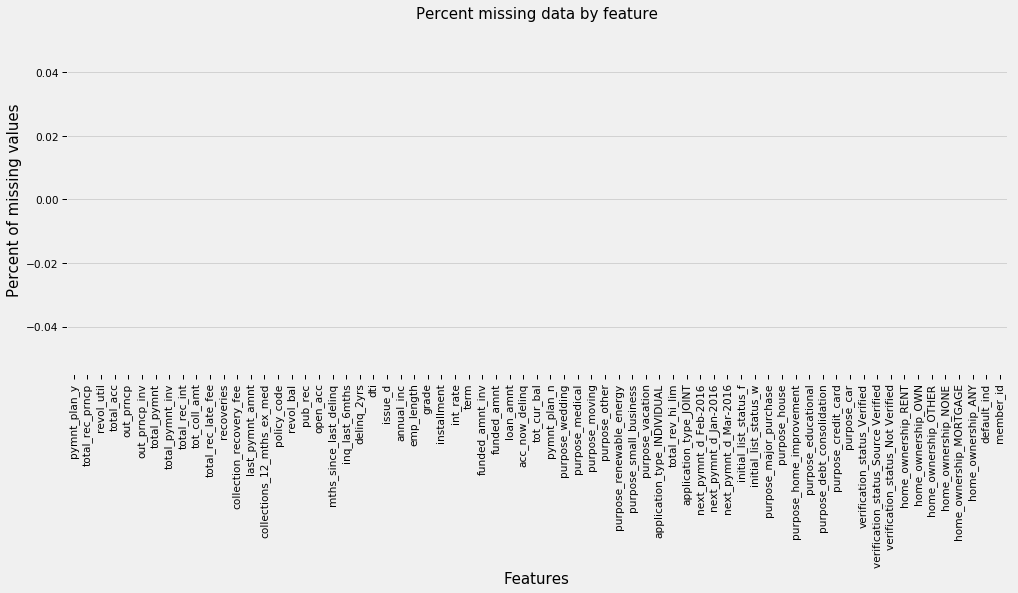

In [64]:
#visualization of missing values by each features
total = data_f.isnull().sum().sort_values(ascending=False)
percent = (data_f.isnull().sum()/data_f.isnull().count()).sort_values(ascending= False) 
missing_data = pd.concat([total, percent], axis = 1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data.shape

In [65]:
data_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 69 columns):
member_id                              855969 non-null int64
loan_amnt                              855969 non-null float64
funded_amnt                            855969 non-null float64
funded_amnt_inv                        855969 non-null float64
term                                   855969 non-null float64
int_rate                               855969 non-null float64
installment                            855969 non-null float64
grade                                  855969 non-null float64
emp_length                             855969 non-null float64
annual_inc                             855969 non-null float64
issue_d                                855969 non-null datetime64[ns]
dti                                    855969 non-null float64
delinq_2yrs                            855969 non-null float64
inq_last_6mths                         855969 non-null float64
mt

In [44]:
#data_f.to_csv("E:\\python backup\\Handling_missing_values.csv", index = False)

In [3]:
#data_f = pd.read_csv("E:\\python backup\\Handling_missing_values.csv", parse_dates = ['issue_d'])

### Finding Outlier in dataset

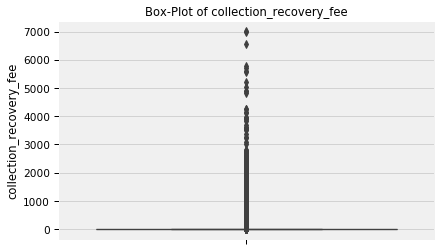

In [66]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline  

sns.boxplot(y = "collection_recovery_fee",data=data_f)
plt.title("Box-Plot of collection_recovery_fee")
plt.show()

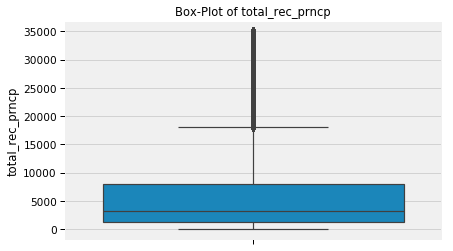

In [67]:
sns.boxplot(y = "total_rec_prncp",data=data_f)
plt.title("Box-Plot of total_rec_prncp")
plt.show()

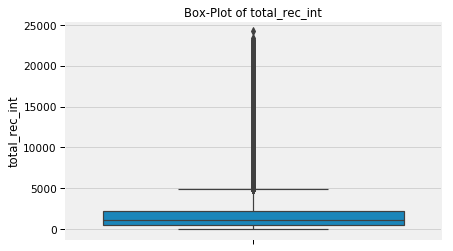

In [68]:
sns.boxplot(y = "total_rec_int",data=data_f)
plt.title("Box-Plot of total_rec_int")
plt.show()

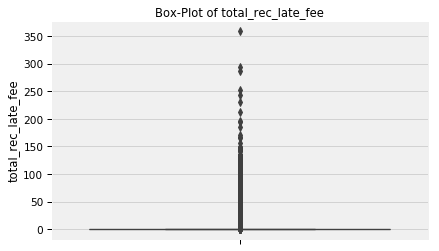

In [69]:
sns.boxplot(y = "total_rec_late_fee",data=data_f)
plt.title("Box-Plot of total_rec_late_fee")
plt.show()

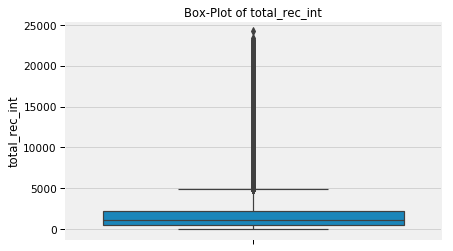

In [70]:
sns.boxplot(y = "total_rec_int",data=data_f)
plt.title("Box-Plot of total_rec_int")
plt.show()

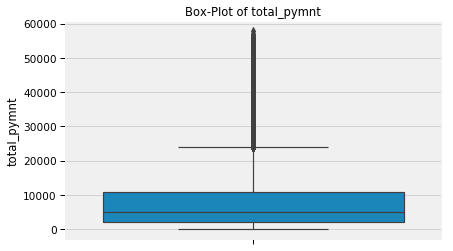

In [71]:
sns.boxplot(y = "total_pymnt",data=data_f)
plt.title("Box-Plot of total_pymnt")
plt.show()

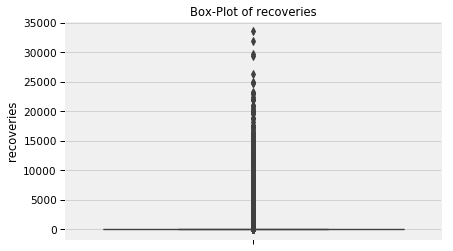

In [72]:
sns.boxplot(y = "recoveries",data=data_f)
plt.title("Box-Plot of recoveries")
plt.show()

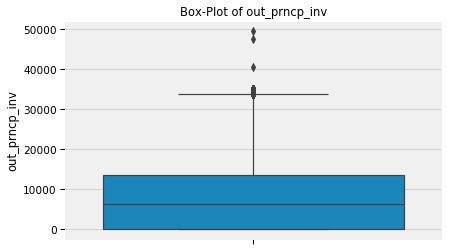

In [73]:
sns.boxplot(y = "out_prncp_inv",data=data_f)
plt.title("Box-Plot of out_prncp_inv")
plt.show()

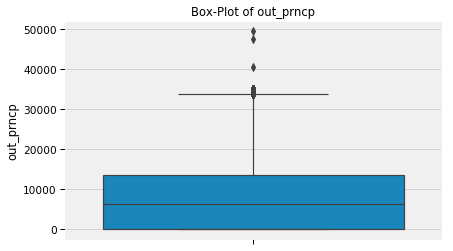

In [74]:
sns.boxplot(y = "out_prncp",data=data_f)
plt.title("Box-Plot of out_prncp")
plt.show()

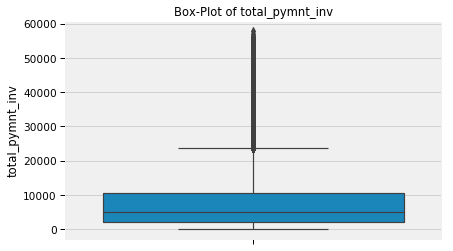

In [75]:
sns.boxplot(y = "total_pymnt_inv",data=data_f)
plt.title("Box-Plot of total_pymnt_inv")
plt.show()

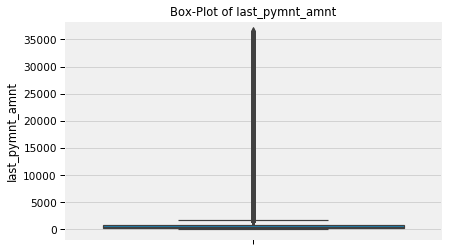

In [76]:
sns.boxplot(y = "last_pymnt_amnt",data=data_f)
plt.title("Box-Plot of last_pymnt_amnt")
plt.show()

### Bivariate Analysis

collection_recovery_fee

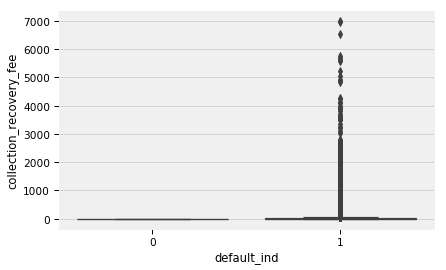

In [77]:
#plt.boxplot(data_f.total_rec_prncp)
sns.boxplot('default_ind','collection_recovery_fee',data=data_f)

total_rec_prncp

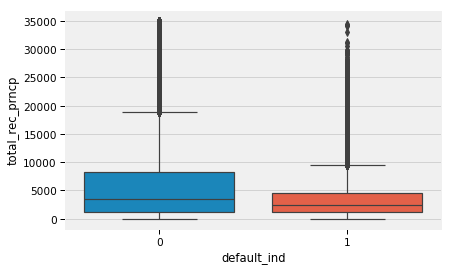

In [78]:
sns.boxplot('default_ind','total_rec_prncp',data=data_f)

total_rec_int

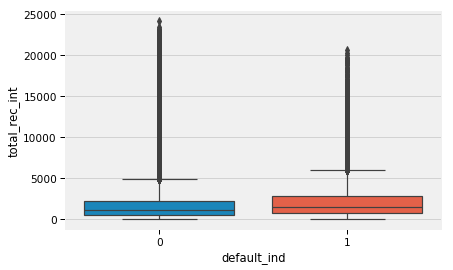

In [79]:
sns.boxplot('default_ind','total_rec_int',data=data_f)

total_pymnt

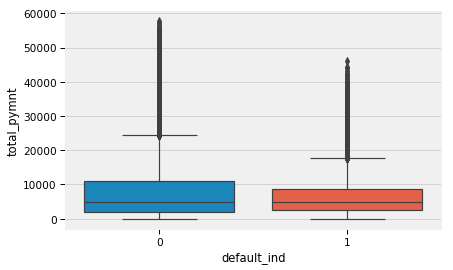

In [80]:
sns.boxplot('default_ind','total_pymnt',data=data_f)

recoveries

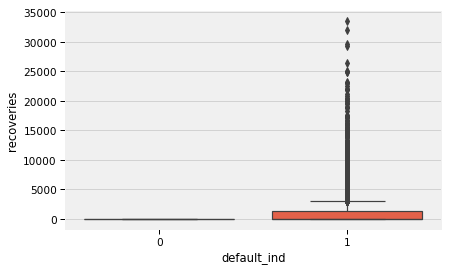

In [81]:
sns.boxplot('default_ind','recoveries',data=data_f)

out_prncp_inv

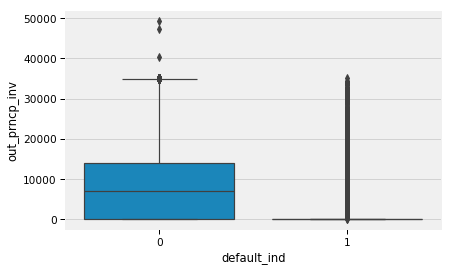

In [82]:
sns.boxplot('default_ind','out_prncp_inv',data=data_f)

out_prncp  

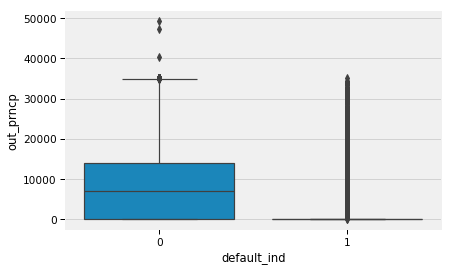

In [83]:
sns.boxplot('default_ind','out_prncp',data=data_f)

total_rec_late_fee

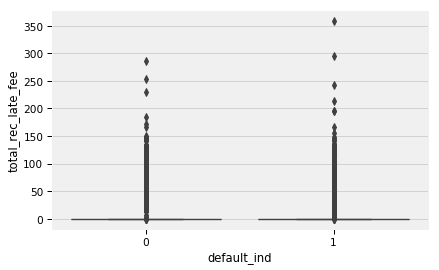

In [84]:
sns.boxplot('default_ind','total_rec_late_fee',data=data_f)

total_pymnt_inv

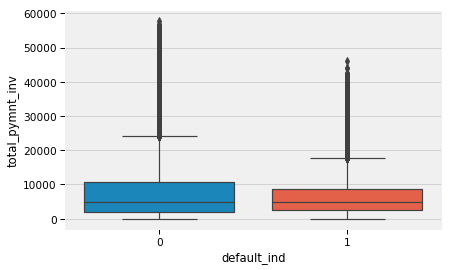

In [85]:
sns.boxplot('default_ind','total_pymnt_inv',data=data_f)

last_pymnt_amnt

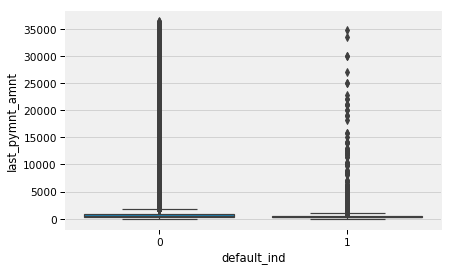

In [86]:
sns.boxplot('default_ind','last_pymnt_amnt',data=data_f)


In [87]:
import numpy as np

def removeOutliers(data_f, outlierConstant):
    a = np.array(data_f)
    upper_quartile = np.percentile(a, 75)
    lower_quartile = np.percentile(a, 25)
    IQR = (upper_quartile - lower_quartile) * outlierConstant
    quartileSet = (lower_quartile - IQR, upper_quartile + IQR)
    resultList = []
    for y in a.tolist():
        if y >= quartileSet[0] and y <= quartileSet[1]:
            resultList.append(y)
    return resultList

#### Correlation Matrix as HeatMap

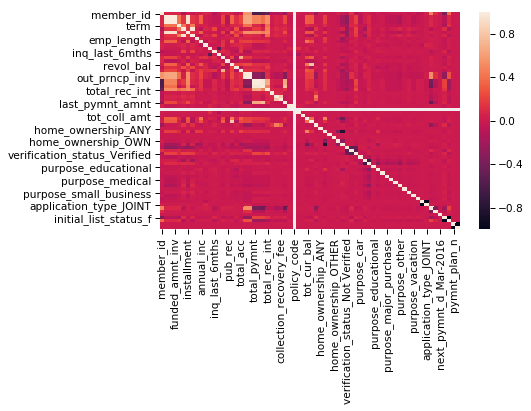

In [88]:
corr = data_f.corr()
sns.heatmap(corr)

#### Pearson Correlation

In [89]:
# method : {‘pearson’, ‘kendall’, ‘spearman’} or callable
corr = data_f.corr(method='pearson')
corr.head()

member_id  loan_amnt  funded_amnt  funded_amnt_inv      term  \
member_id         1.000000   0.063603     0.065862         0.070248  0.070519   
loan_amnt         0.063603   1.000000     0.999265         0.997601  0.411192   
funded_amnt       0.065862   0.999265     1.000000         0.998485  0.410209   
funded_amnt_inv   0.070248   0.997601     0.998485         1.000000  0.410575   
term              0.070519   0.411192     0.410209         0.410575  1.000000   

                 int_rate  installment     grade  emp_length  annual_inc  ...  \
member_id       -0.142996     0.024311 -0.004049    0.012718    0.034338  ...   
loan_amnt        0.142966     0.944870  0.150866    0.103360    0.335209  ...   
funded_amnt      0.143116     0.945903  0.150698    0.103611    0.335002  ...   
funded_amnt_inv  0.143374     0.944149  0.149884    0.104736    0.334356  ...   
term             0.427411     0.143864  0.444810    0.067567    0.059057  ...   

                 purpose_wedding  application_type_INDIVIDUAL  \
member_id              -0.069298                    -0.033205   
loan_amnt              -0.025865                    -0.011044   
funded_amnt            -0.026197                    -0.011087   
funded_amnt_inv        -0.027617                    -0.011114   
term                   -0.014718                    -0.011003   

                 application_type_JOINT  next_pymnt_d_Feb-2016  \
member_id                      0.033205               0.483699   
loan_amnt                      0.011044               0.074134   
funded_amnt                    0.011087               0.076003   
funded_amnt_inv                0.011114               0.079855   
term                           0.011003               0.087966   

                 next_pymnt_d_Jan-2016  next_pymnt_d_Mar-2016  \
member_id                     0.097204               0.006504   
loan_amnt                     0.020501               0.000511   
funded_amnt                   0.020812               0.000525   
funded_amnt_inv               0.021662               0.000551   
term                          0.024228              -0.001663   

                 initial_list_status_f  initial_list_status_w  pymnt_plan_n  \
member_id                    -0.372368               0.372368      0.002174   
loan_amnt                    -0.085440               0.085440     -0.000761   
funded_amnt                  -0.087014               0.087014     -0.000766   
funded_amnt_inv              -0.090470               0.090470     -0.000752   
term                         -0.132658               0.132658      0.000522   

                 pymnt_plan_y  
member_id           -0.002174  
loan_amnt            0.000761  
funded_amnt          0.000766  
funded_amnt_inv      0.000752  
term                -0.000522  

[5 rows x 68 columns]

#### Heatmap

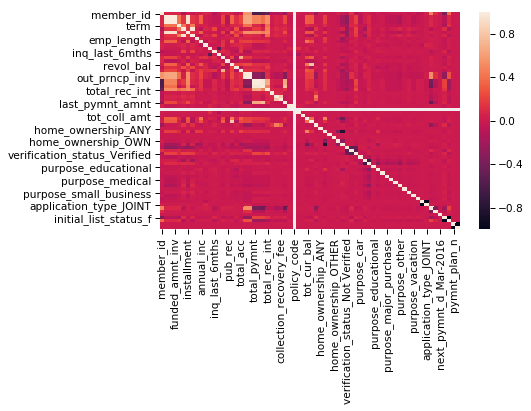

In [90]:
sns.heatmap(corr) # this will give you a basic heat map

In [91]:
data_f.head()

member_id  loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  \
0    1296599     5000.0       5000.0           4975.0   0.0     10.65   
1    1314167     2500.0       2500.0           2500.0   1.0     15.27   
2    1313524     2400.0       2400.0           2400.0   0.0     15.96   
3    1277178    10000.0      10000.0          10000.0   0.0     13.49   
4    1311748     3000.0       3000.0           3000.0   1.0     12.69   

   installment  grade  emp_length  annual_inc  ... purpose_wedding  \
0       162.87    2.0        10.0     24000.0  ...               0   
1        59.83    3.0         0.5     30000.0  ...               0   
2        84.33    3.0        10.0     12252.0  ...               0   
3       339.31    3.0        10.0     49200.0  ...               0   
4        67.79    2.0         1.0     80000.0  ...               0   

   application_type_INDIVIDUAL  application_type_JOINT  next_pymnt_d_Feb-2016  \
0                            1                       0                      0   
1                            1                       0                      0   
2                            1                       0                      0   
3                            1                       0                      0   
4                            1                       0                      1   

   next_pymnt_d_Jan-2016  next_pymnt_d_Mar-2016  initial_list_status_f  \
0                      0                      0                      1   
1                      0                      0                      1   
2                      0                      0                      1   
3                      0                      0                      1   
4                      0                      0                      1   

   initial_list_status_w  pymnt_plan_n  pymnt_plan_y  
0                      0             1             0  
1                      0             1             0  
2                      0             1             0  
3                      0             1             0  
4                      0             1             0  

[5 rows x 69 columns]

### performing the independent t test on numerical variables

In [92]:
## performing the independent t test on numerical variables
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

tstats_df = pd.DataFrame()

for eachvariable in numeric_var_names:
    tstats = stats.ttest_ind(data_f.loc[data_f["default_ind"] == 1,eachvariable],data_f.loc[data_f["default_ind"] == 0, eachvariable],equal_var=False)
    temp = pd.DataFrame([eachvariable, tstats[0], tstats[1]]).T
    temp.columns = ['Variable Name', 'T-Statistic', 'P-Value']
    tstats_df = pd.concat([tstats_df, temp], axis=0, ignore_index=True)
    
tstats_df =  tstats_df.sort_values(by = "P-Value").reset_index(drop = True)

In [93]:
tstats_df

Variable Name T-Statistic       P-Value
0                    member_id    -350.239             0
1                  tot_cur_bal    -38.1338             0
2              last_pymnt_amnt    -297.044             0
3      collection_recovery_fee     77.6902             0
4                   recoveries     119.888             0
5           total_rec_late_fee     47.9088             0
6                total_rec_int     39.6933             0
7              total_rec_prncp    -156.221             0
8              total_pymnt_inv    -52.6673             0
9                  total_pymnt     -51.282             0
10               out_prncp_inv    -605.185             0
11                   out_prncp    -605.231             0
12            total_rev_hi_lim    -42.3757             0
13                  revol_util     41.7079             0
14                 default_ind         inf             0
15                    int_rate     145.647             0
16                  annual_inc     -38.453             0
17              inq_last_6mths     59.3097             0
18                   revol_bal    -24.0104  9.55919e-127
19                     pub_rec     -23.027  8.74991e-117
20                    open_acc    -21.4977  4.48658e-102
21                   total_acc    -19.9653   2.35945e-88
22  collections_12_mths_ex_med    -13.3449   1.45802e-40
23                 delinq_2yrs    -9.07378   1.18797e-19
24                         dti     8.13524   4.17204e-16
25             funded_amnt_inv    -7.62466   2.48829e-14
26                tot_coll_amt    -5.98285   2.19374e-09
27                 funded_amnt    -5.39535   6.86875e-08
28                   loan_amnt    -4.55673   5.20734e-06
29                 installment     4.34587   1.38987e-05
30              acc_now_delinq    -3.13577    0.00171499
31      mths_since_last_delinq     0.84357      0.398913
32                 policy_code         NaN           NaN

#### Deleting Unnecessary Columns

In [94]:
data_f = data_f.drop(['policy_code', 'member_id'], axis = 1)

In [95]:
data_f.shape

(855969, 67)

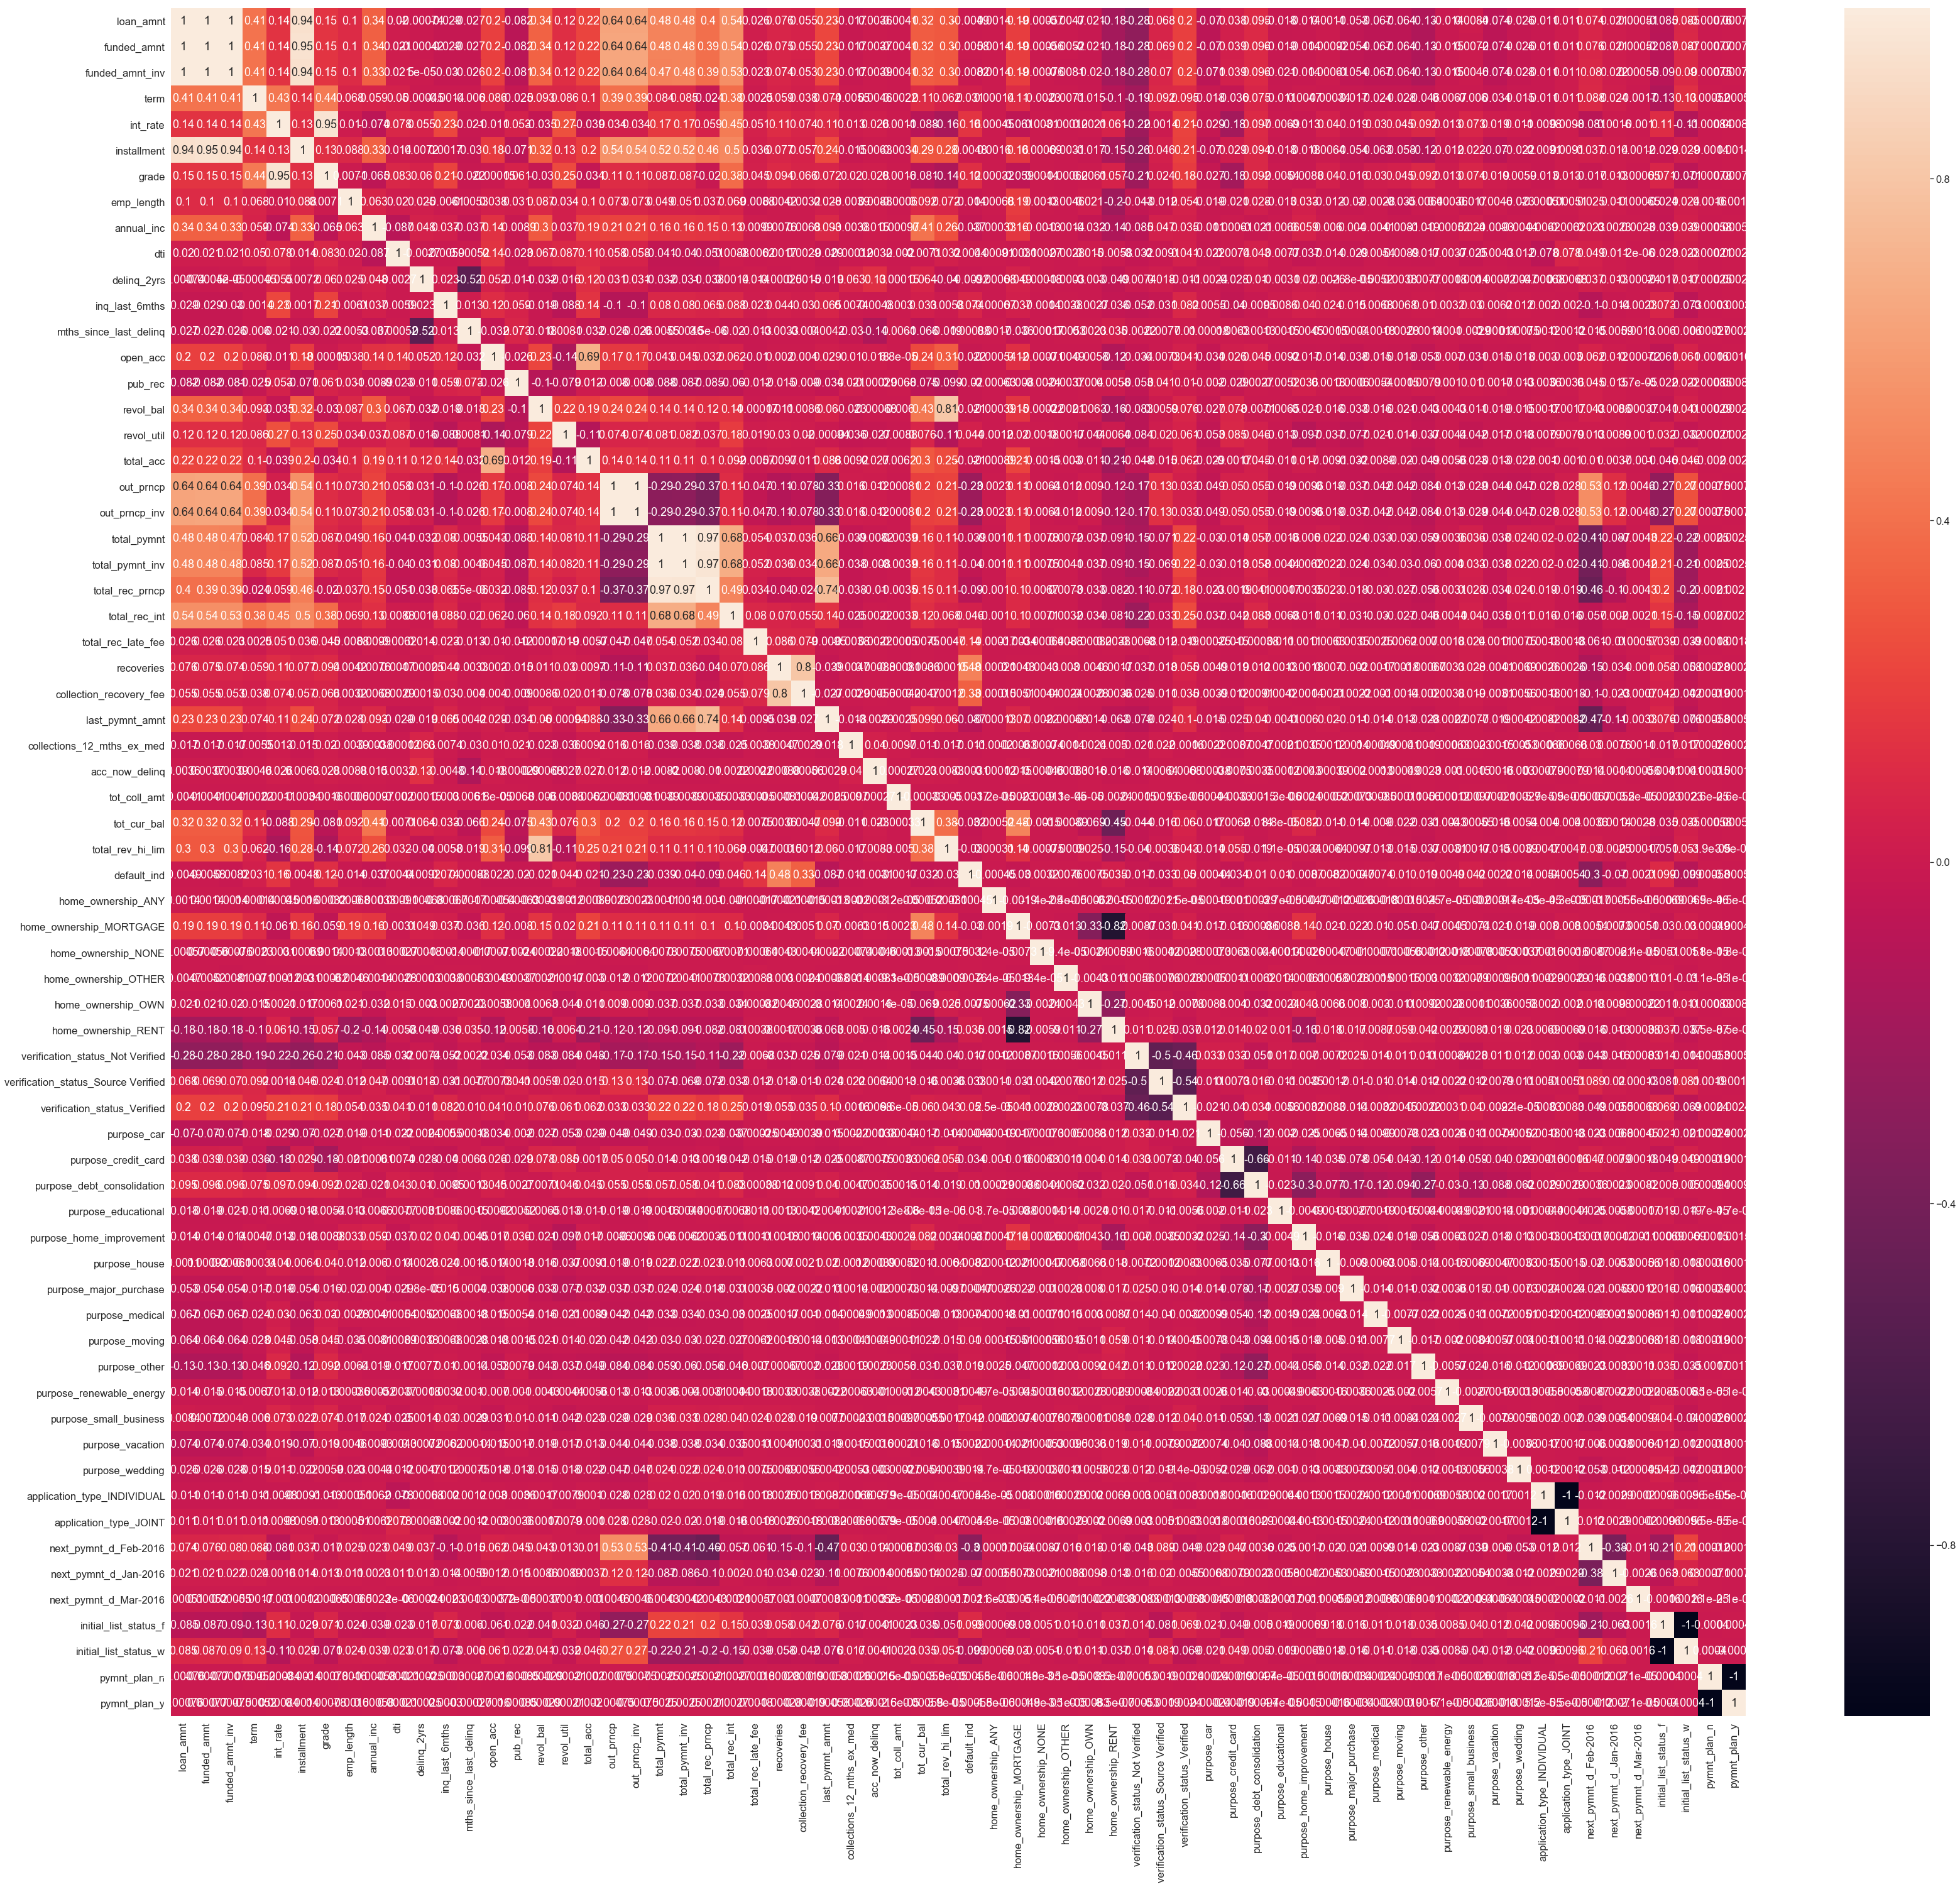

In [96]:
sns.set(font_scale=1.5)
plt.figure(figsize=(50,50))
sns.heatmap(data_f.corr(),annot=True)
plt.xticks(rotation=90)
plt.savefig('Correlation Matrix')
plt.show()

In [78]:
#data_f.to_csv("E:\\python backup\\correlation.csv", index = False)

In [4]:
#data_f = pd.read_csv("E:\\python backup\\correlation.csv", parse_dates = ['issue_d'], low_memory=False )

# Split Train and Test data with issue_d date.

In [97]:
train = data_f[data_f['issue_d'] < '2015-6-01']
test = data_f[data_f['issue_d'] >= '2015-6-01']

In [98]:
train=train.drop(['issue_d'],axis=1)
test=test.drop(['issue_d'],axis=1)

In [99]:
print(train.shape)
print(test.shape)

(598978, 66)
(256991, 66)


In [100]:
X_train = train.drop('default_ind',axis=1)
y_train = train.loc[:,['default_ind']]
X_test =test.drop('default_ind',axis=1)
y_test = test.loc[:,['default_ind']]

In [101]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(598978, 65)
(256991, 65)
(598978, 1)
(256991, 1)


In [102]:
print(X_train.shape[0]+X_test.shape[0])

855969


# Feature Selection

In [103]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

In [104]:
bestfeatures = SelectKBest(score_func=chi2, k=20)
fit = bestfeatures.fit(X_train,y_train)

In [105]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)

In [106]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
featureScores.nlargest(20,'Score')  #print 20 best feature

Specs         Score
25               recoveries  4.824538e+08
18                out_prncp  2.694688e+08
19            out_prncp_inv  2.693896e+08
31              tot_cur_bal  1.320639e+08
22          total_rec_prncp  1.239397e+08
27          last_pymnt_amnt  9.892894e+07
21          total_pymnt_inv  6.800904e+07
20              total_pymnt  6.709542e+07
8                annual_inc  5.345075e+07
26  collection_recovery_fee  5.076075e+07
32         total_rev_hi_lim  2.057806e+07
15                revol_bal  6.949852e+06
30             tot_coll_amt  7.901251e+05
24       total_rec_late_fee  4.614676e+05
23            total_rec_int  2.496253e+05
58    next_pymnt_d_Feb-2016  2.368368e+04
4                  int_rate  2.308768e+04
2           funded_amnt_inv  1.676901e+04
16               revol_util  1.192867e+04
6                     grade  7.729892e+03

# Chi-Squared

##### This is  filter-based method.


###### In this method, we calculate the chi-square metric between the target and the numerical variable and only select  the variable with the maximum chi-squared values.

In [107]:
feature_name = list(X_train.columns)
num_feats=15

In [108]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

chi_selector = SelectKBest(chi2, k=num_feats)
chi_selector.fit(X_train, y_train)
chi_support = chi_selector.get_support()
chi_feature = X_train.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')

15 selected features


In [109]:
chi_feature

['annual_inc',
 'revol_bal',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim']

# Recursive Feature Elimination

##### The goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

In [110]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=num_feats, step=10, verbose=5)
rfe_selector.fit(X_train, y_train)

Fitting estimator with 65 features.
Fitting estimator with 55 features.
Fitting estimator with 45 features.
Fitting estimator with 35 features.
Fitting estimator with 25 features.


RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='warn', n_jobs=None, penalty='l2',
                                 random_state=None, solver='warn', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=15, step=10, verbose=5)

In [111]:
rfe_support = rfe_selector.get_support()
rfe_feature = X_train.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

15 selected features


In [112]:
rfe_feature

['funded_amnt',
 'funded_amnt_inv',
 'int_rate',
 'emp_length',
 'dti',
 'mths_since_last_delinq',
 'open_acc',
 'revol_util',
 'total_acc',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries']

# Lasso: SelectFromModel

###### This is an Embedded method.  Embedded methods use algorithms that have built-in feature selection methods.

In [113]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l1"), max_features=num_feats)
embeded_lr_selector.fit(X_train, y_train)

SelectFromModel(estimator=LogisticRegression(C=1.0, class_weight=None,
                                             dual=False, fit_intercept=True,
                                             intercept_scaling=1, l1_ratio=None,
                                             max_iter=100, multi_class='warn',
                                             n_jobs=None, penalty='l1',
                                             random_state=None, solver='warn',
                                             tol=0.0001, verbose=0,
                                             warm_start=False),
                max_features=15, norm_order=1, prefit=False, threshold=None)

In [114]:
embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X_train.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')

15 selected features


In [115]:
embeded_lr_feature

['term',
 'home_ownership_NONE',
 'home_ownership_OTHER',
 'verification_status_Not Verified',
 'verification_status_Source Verified',
 'verification_status_Verified',
 'purpose_car',
 'purpose_educational',
 'purpose_major_purchase',
 'purpose_renewable_energy',
 'purpose_vacation',
 'purpose_wedding',
 'next_pymnt_d_Feb-2016',
 'next_pymnt_d_Jan-2016',
 'next_pymnt_d_Mar-2016']

# Tree-based:SelectFromModel

##### This is an Embedded method.We can also use RandomForest to select features based on feature importance.We calculate feature importance using node impurities in each decision tree. In Random forest, the final feature importance is the average of all decision tree feature importance.

In [116]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), max_features=num_feats)
embeded_rf_selector.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=None,
                                                 oob_score=False,
                                                 random_state=None, verbose=0,
  

In [117]:
embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X_train.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

14 selected features


In [118]:
embeded_rf_feature

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'installment',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'next_pymnt_d_Feb-2016']

# Feature importance Attributes

In [119]:
pd.set_option('display.max_rows', None)
# put all selection together
feature_selection_df = pd.DataFrame({'Feature':feature_name, 'Chi-2':chi_support, 'RFE':rfe_support, 'Logistics':embeded_lr_support,
                                    'Random Forest':embeded_rf_support})
# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# display the top 100
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df.head(num_feats)

Feature  Chi-2    RFE  Logistics  \
1                       total_rec_prncp   True   True      False   
2                         total_rec_int   True   True      False   
3                       total_pymnt_inv   True   True      False   
4                           total_pymnt   True   True      False   
5                            recoveries   True   True      False   
6                    total_rec_late_fee   True   True      False   
7                         out_prncp_inv   True  False      False   
8                             out_prncp   True  False      False   
9                 next_pymnt_d_Feb-2016  False  False       True   
10                      last_pymnt_amnt   True  False      False   
11                      funded_amnt_inv  False   True      False   
12                          funded_amnt  False   True      False   
13              collection_recovery_fee   True  False      False   
14         verification_status_Verified  False  False       True   
15  verification_status_Source Verified  False  False       True   

    Random Forest  Total  
1            True      3  
2            True      3  
3            True      3  
4            True      3  
5            True      3  
6           False      2  
7            True      2  
8            True      2  
9            True      2  
10           True      2  
11           True      2  
12           True      2  
13           True      2  
14          False      1  
15          False      1

In [52]:
#feature_selection_df.to_csv("E:\\python backup\\feature_selection.csv", index = False)

In [53]:
#feature_selection_df = pd.read_csv("E:\\python backup\\feature_selection.csv")

In [120]:
feature_selection_df.head()

Feature  Chi-2   RFE  Logistics  Random Forest  Total
1  total_rec_prncp   True  True      False           True      3
2    total_rec_int   True  True      False           True      3
3  total_pymnt_inv   True  True      False           True      3
4      total_pymnt   True  True      False           True      3
5       recoveries   True  True      False           True      3

In [121]:
Model_X_train = X_train.loc[:,['total_rec_prncp','total_rec_late_fee','total_rec_int','total_pymnt','recoveries','out_prncp_inv','total_pymnt_inv', 'out_prncp', 'next_pymnt_d_Feb-2016', 'last_pymnt_amnt', 'funded_amnt_inv', 'funded_amnt', 'collection_recovery_fee']]
Model_y_train = y_train.loc[:,['default_ind']]
Model_X_test = X_test.loc[:,['total_rec_prncp','total_rec_late_fee','total_rec_int','total_pymnt','recoveries','out_prncp_inv','total_pymnt_inv', 'out_prncp', 'next_pymnt_d_Feb-2016', 'last_pymnt_amnt', 'funded_amnt_inv', 'funded_amnt', 'collection_recovery_fee']]
Model_y_test = y_test.loc[:,['default_ind']]

In [122]:
print(Model_X_train.shape)
print(Model_X_test.shape)
print(Model_y_train.shape)
print(Model_y_test.shape)

(598978, 13)
(256991, 13)
(598978, 1)
(256991, 1)


# Smote

In [123]:
from imblearn.over_sampling import SMOTE

#from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Number X_train dataset: ", Model_X_train.shape)
print("Number y_train dataset: ", Model_y_train.shape)
print("Number  X_test dataset: ", Model_X_test.shape)
print("Number  y_test dataset: ", Model_y_test.shape)

Number X_train dataset:  (598978, 13)
Number y_train dataset:  (598978, 1)
Number  X_test dataset:  (256991, 13)
Number  y_test dataset:  (256991, 1)


In [124]:
print(sum(Model_y_train.default_ind==1))


46156


In [125]:
print('Before OverSampling, counts of label "1": {}'.format(sum(Model_y_train.default_ind==1)))
print('Before OverSampling, counts of label "0": {} \n'.format(sum(Model_y_train.default_ind==0)))

sm = SMOTE(random_state=2)
Model_X_train_res, Model_y_train_res = sm.fit_sample(Model_X_train, Model_y_train.default_ind.ravel())

print('After OverSampling, the shape of train_X: {}'.format(Model_X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(Model_y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(Model_y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(Model_y_train_res==0)))

Before OverSampling, counts of label "1": 46156
Before OverSampling, counts of label "0": 552822 

After OverSampling, the shape of train_X: (1105644, 13)
After OverSampling, the shape of train_y: (1105644,) 

After OverSampling, counts of label '1': 552822
After OverSampling, counts of label '0': 552822


# Scaling the data

In [126]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(Model_X_train)
Model_X_train=scaler.transform(Model_X_train)
Model_X_test=scaler.transform(Model_X_test)
print(Model_X_train)
print(Model_X_test)

[[-0.39443449 -0.10353403 -0.62244154 ... -1.1398812  -1.14341202
  -0.09486183]
 [-1.05070409 -0.10353403 -0.80998233 ... -1.43672608 -1.44362136
  -0.07998006]
 [-0.76997888 -0.10353403 -0.73579385 ... -1.44871981 -1.45562974
  -0.09486183]
 ...
 [-0.85021538 -0.10353403 -0.15384496 ... -0.17738418 -0.18274212
  -0.09486183]
 [-0.89236446 -0.10353403 -0.01745406 ... -0.2973215  -0.30282585
  -0.09486183]
 [-0.26601853 -0.10353403 -0.09683855 ...  0.66217709  0.65784405
  -0.09486183]]
[[-1.02390033 -0.10353403 -0.98370965 ...  1.26186371  1.25826274
  -0.09486183]
 [-1.09070823 -0.10353403 -0.95442705 ...  0.42230244  0.41767657
  -0.09486183]
 [-1.11663524 -0.10353403 -1.00160507 ... -0.89700812 -0.90324454
  -0.09486183]
 ...
 [-0.5465473  -0.10353403  0.04342734 ...  1.26186371  1.25826274
  -0.09486183]
 [-0.46982936 -0.10353403 -0.60941188 ...  1.26186371  1.25826274
  -0.09486183]
 [-0.77169194 -0.10353403 -0.50939306 ...  1.22288408  1.21923552
  -0.09486183]]


In [127]:
Model_y_train=Model_y_train.astype(int)
Model_y_test=Model_y_test.astype(int)

# Logistic Regression 'MODEL BUILDING'

In [183]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from statistics import mode
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import Imputer, RobustScaler, FunctionTransformer
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.ensemble.partial_dependence import plot_partial_dependence
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (roc_auc_score, confusion_matrix,
                             accuracy_score, roc_curve,
                             precision_recall_curve, f1_score)
from sklearn.pipeline import make_pipeline
from scipy.stats import boxcox
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import learning_curve 
from sklearn.model_selection import validation_curve 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import learning_curve

%matplotlib inline


## Train the Logistic Regression Model

In [184]:
# fit logistic regression
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
logmodel.fit(Model_X_train,Model_y_train)
#predictions = logmodel.predict(Model_X_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [130]:
# Model Performance
scores = cross_val_score(logmodel, Model_X_train, Model_y_train, cv=10)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))


CV accuracy: 0.996 +/- 0.002


### Assessing model performance
- Learning curves allow us to diagnose if the is overfitting or underfitting

In [131]:
def plot_learning_curve(estimator, title, Model_X_train, Model_y_train, ylim=None, cv=None,            
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)): 
    plt.figure() 
    plt.title(title) 
    if ylim is not None:     
        plt.ylim(*ylim) 
    plt.xlabel("Training examples")  
    plt.ylabel("Score") 
    train_sizes, train_scores, test_scores = learning_curve(    
        estimator, Model_X_train, Model_y_train, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes) 
    train_scores_mean = np.mean(train_scores, axis=1)  
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1) 
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid() 
        
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,            
                     train_scores_mean + train_scores_std, alpha=0.1, 
                     color="r") 
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,     
                     test_scores_mean + test_scores_std, alpha=0.1, color="g") 
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", 
             label="Training score") 
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", 
             label="Validation score")
    plt.legend(loc="best")   
    return plt


### Validation curve
- Validation curves are a tool that we can use to improve the performance of our model. It counts as a way of tuning our hyperparameters. 

In [132]:
def plot_validation_curve(estimator, title, Model_X_train, Model_y_train, param_name, param_range, ylim=None,
                          cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    train_scores, test_scores = validation_curve(estimator, Model_X_train, Model_y_train, param_name, param_range, cv) 
    train_mean = np.mean(train_scores, axis=1)   
    train_std = np.std(train_scores, axis=1) 
    test_mean = np.mean(test_scores, axis=1)  
    test_std = np.std(test_scores, axis=1) 
    plt.plot(param_range, train_mean, color='r', marker='o', markersize=5, label='Tra ining score') 
    plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='r') 
    plt.plot(param_range, test_mean, color='g', linestyle='--', marker='s', markersize=5, label='Validation score') 
    plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha= 0.15, color='g')
    plt.grid()  
    plt.xscale('log')   
    plt.legend(loc='best')
    plt.xlabel('Parameter')  
    plt.ylabel('Score') 
    plt.ylim(ylim)

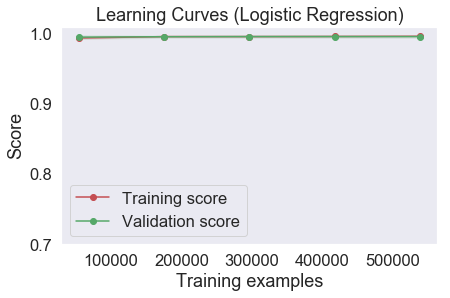

In [133]:
# plot learning curve
title = "Learning Curves (Logistic Regression)"
cv = 10
plot_learning_curve(logmodel, title, Model_X_train, Model_y_train, ylim=(0.7, 1.01), cv=cv, n_jobs= 1);

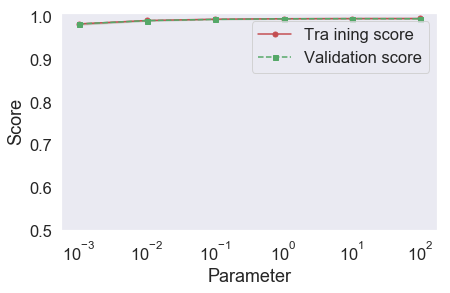

In [134]:
# plot validation curve
title = 'Validation Curve (Logistic Regression)'
param_name = 'C'
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]  
cv = 10
plot_validation_curve(logmodel, title, Model_X_train, Model_y_train, param_name =param_name,    
                      ylim=(0.5, 1.01), param_range=param_range);

# Model Evaluation

In [185]:
from sklearn.metrics import classification_report

predictions = logmodel.predict(Model_X_test)
cm = confusion_matrix(Model_y_test, predictions)
print(cm)
print(accuracy_score(Model_y_test, predictions))
print(classification_report(Model_y_test, predictions))


[[256639     41]
 [    63    248]]
0.9995953165675062
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.86      0.80      0.83       311

    accuracy                           1.00    256991
   macro avg       0.93      0.90      0.91    256991
weighted avg       1.00      1.00      1.00    256991



In [186]:
from sklearn import metrics

confusion = metrics.confusion_matrix(Model_y_test, predictions)
print(confusion)
#[row, column]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]


[[256639     41]
 [    63    248]]


In [187]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print(classification_error)

0.0004046834324937449


#### SENSITIVITY  => True Positive Rate (TPR)  => RECALL

In [188]:
sensitivity = TP / float(FN + TP)

print(sensitivity)

0.797427652733119


#### specificity=>True Negative Rate (TNR)

In [189]:
specificity = TN / (TN + FP)
print(specificity)

0.999840268038024


#### PRECISION

In [190]:
precision = TP / float(TP + FP)
print(precision)
print(metrics.precision_score(Model_y_test, predictions))

0.8581314878892734
0.8581314878892734


In [191]:
print(logmodel.coef_)
print(logmodel.intercept_)

[[ -9.20270664   0.19145321   3.7694791   -5.60956988  19.86788767
  -10.13910917  -7.01001577 -10.22730095  -0.60339146 -13.4758494
    9.09730343  14.13842189   6.37583661]]
[-5.95315849]


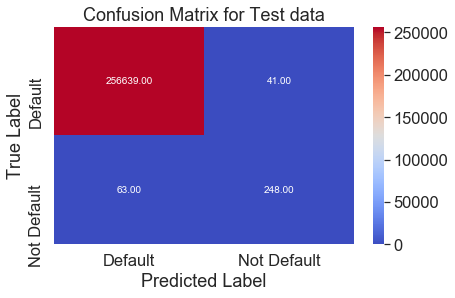

In [142]:
sns.heatmap(cm,annot=True, fmt=".2f", cmap="coolwarm",
            xticklabels = ["Default", "Not Default"] , yticklabels = ["Default", "Not Default"])
plt.title("Confusion Matrix for Test data")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [192]:
prediction_prob= logmodel.predict_proba(Model_X_test)
print(prediction_prob)

[[0.99786922 0.00213078]
 [0.99477156 0.00522844]
 [0.98915334 0.01084666]
 ...
 [0.99883324 0.00116676]
 [0.99872578 0.00127422]
 [0.99681755 0.00318245]]


In [193]:
from sklearn import metrics
fpr , tpr , z = metrics.roc_curve(Model_y_test , prediction_prob[:,1])
auc = metrics.auc(fpr,tpr)
print(auc)
print(fpr)
print(tpr)

0.9000490933698522
[0.         0.         0.         ... 0.99985196 0.99985975 1.        ]
[0.         0.33440514 0.35691318 ... 1.         1.         1.        ]


#### ROC curve

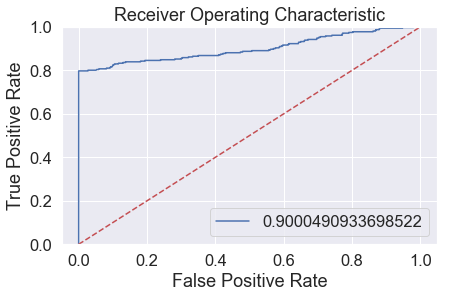

In [194]:
#ROC curve
import matplotlib.pyplot as plt 
#%matplotlib inline 
plt.title('Receiver Operating Characteristic') 
plt.plot(fpr, tpr, 'b', label = auc) 
plt.legend(loc = 'lower right') 
plt.plot([0, 1], [0, 1],'r--') 
#plt.xlim([0, 1]) 
plt.ylim([0, 1]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate')
plt.show()

# K-Fold Method For Cross Validation

In [195]:
from sklearn.linear_model import LogisticRegression
logmodel=(LogisticRegression())
#performing kfold_cross_validation
from sklearn.model_selection import KFold
kfold_cv=KFold(n_splits=10)
print(kfold_cv)

KFold(n_splits=10, random_state=None, shuffle=False)


In [196]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import cross_val_score
kfold_cv_result=cross_val_score(estimator=logmodel,X=Model_X_train,
                                    y=Model_y_train, cv=kfold_cv)
print(kfold_cv_result)
print(kfold_cv_result.mean())

for train_value, test_value in kfold_cv.split(Model_X_train):
    logmodel.fit(Model_X_train, Model_y_train).predict(Model_X_train)
prediction = logmodel.predict(Model_X_test)

[0.9932552  0.99779625 0.99607666 0.99403987 0.99721193 0.99661091
 0.99671108 0.99744566 0.99772944 0.99739553]
0.9964272515358852


In [197]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

cm = confusion_matrix(Model_y_test, prediction)
print(cm)

print("Classification report: ")


print(classification_report(Model_y_test, prediction))

accu = accuracy_score(Model_y_test, prediction)
print("Accuracy of the model: ",accu)

[[256639     41]
 [    63    248]]
Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.86      0.80      0.83       311

    accuracy                           1.00    256991
   macro avg       0.93      0.90      0.91    256991
weighted avg       1.00      1.00      1.00    256991

Accuracy of the model:  0.9995953165675062


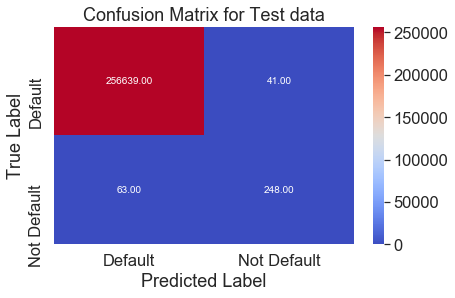

In [149]:
sns.heatmap(cm,annot=True, fmt=".2f", cmap="coolwarm",
            xticklabels = ["Default", "Not Default"] , yticklabels = ["Default", "Not Default"])
plt.title("Confusion Matrix for Test data")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [198]:
prediction_prob= logmodel.predict_proba(Model_X_test)
print(prediction_prob)

[[0.99786922 0.00213078]
 [0.99477156 0.00522844]
 [0.98915334 0.01084666]
 ...
 [0.99883324 0.00116676]
 [0.99872578 0.00127422]
 [0.99681755 0.00318245]]


In [199]:
from sklearn import metrics
fpr , tpr , z = metrics.roc_curve(Model_y_test , prediction_prob[:,1])
auc = metrics.auc(fpr,tpr)
print(auc)
print(fpr)
print(tpr)

0.9000490933698522
[0.         0.         0.         ... 0.99985196 0.99985975 1.        ]
[0.         0.33440514 0.35691318 ... 1.         1.         1.        ]


#### ROC Curve

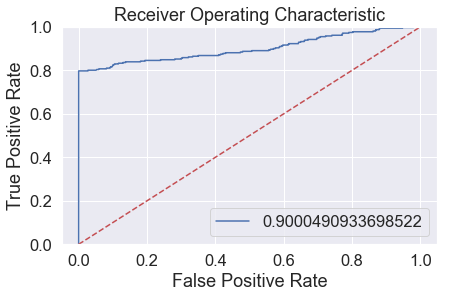

In [201]:
#ROC curve
import matplotlib.pyplot as plt 
#%matplotlib inline 
plt.title('Receiver Operating Characteristic') 
plt.plot(fpr, tpr, 'b', label = auc) 
plt.legend(loc = 'lower right') 
plt.plot([0, 1], [0, 1],'r--') 
#plt.xlim([0, 1]) 
plt.ylim([0, 1]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate')
plt.show()

# Decision Tree Model

In [202]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import export_graphviz

In [203]:
from sklearn.tree import DecisionTreeClassifier
model_DT = DecisionTreeClassifier(random_state=10,min_samples_leaf=100,max_depth=25,criterion='gini')
#default criterion is gini
model_DT.fit(Model_X_train,Model_y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=25,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=10, splitter='best')

In [204]:
predictions = model_DT.predict(Model_X_test)
#print(prediction)
print(list(zip(Model_y_test,predictions)))

[('default_ind', 0)]


# Evaluation Of Model

In [205]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

cfm = confusion_matrix(Model_y_test, predictions)
print(cfm)


print("Classification report: ")

print(classification_report(Model_y_test, predictions))

accu = accuracy_score(Model_y_test, predictions)
print("Accuracy of the model: ",accu)

[[256672      8]
 [    63    248]]
Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.97      0.80      0.87       311

    accuracy                           1.00    256991
   macro avg       0.98      0.90      0.94    256991
weighted avg       1.00      1.00      1.00    256991

Accuracy of the model:  0.999723725733586


In [206]:
confusion = metrics.confusion_matrix(Model_y_test, predictions)
print(confusion)
#[row, column]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]

[[256672      8]
 [    63    248]]


#### SENSITIVITY  => True Positive Rate (TPR)  => RECALL

In [207]:
sensitivity = TP / float(FN + TP)

print(sensitivity)
print(metrics.recall_score(y_test, predictions))

0.797427652733119
0.797427652733119


#### SPECIFICITY => True Negative Rate (TNR)

In [208]:
specificity = TN / (TN + FP)
print(specificity)


0.9999688327879072


#### False Positive Rate


In [209]:
false_positive_rate = FP / float(TN + FP)
print(false_positive_rate)
print(1 - specificity)

3.116721209287829e-05
3.11672120928419e-05


 #### PRECISION

In [210]:
precision = TP / float(TP + FP)
print(precision)

0.96875


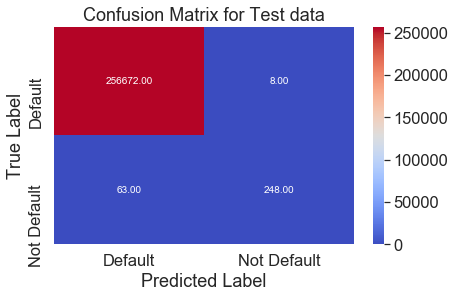

In [211]:
sns.heatmap(cfm,annot=True, fmt=".2f", cmap="coolwarm",
            xticklabels = ["Default", "Not Default"] , yticklabels = ["Default", "Not Default"])
plt.title("Confusion Matrix for Test data")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [212]:
predictions_prob= model_DT.predict_proba(Model_X_test)
print(predictions_prob)

[[0.54761905 0.45238095]
 [0.54761905 0.45238095]
 [0.54       0.46      ]
 ...
 [0.98       0.02      ]
 [1.         0.        ]
 [0.98039216 0.01960784]]


In [213]:
from sklearn import metrics
fpr , tpr , z = metrics.roc_curve(Model_y_test , predictions_prob[:,1])
auc = metrics.auc(fpr,tpr)
print(auc)
print(fpr)
print(tpr)

0.9183297217950511
[0.00000000e+00 1.16877045e-05 1.16877045e-05 1.55836060e-05
 3.11672121e-05 1.24045504e-01 3.12638305e-01 5.73289699e-01
 5.73305283e-01 5.73316971e-01 5.73320866e-01 6.02921926e-01
 6.02929718e-01 6.02933614e-01 6.02949197e-01 6.02953093e-01
 6.09135889e-01 6.28888110e-01 6.28892006e-01 6.28911485e-01
 6.67648434e-01 6.67656226e-01 6.75693470e-01 6.86247468e-01
 6.86598099e-01 6.91129032e-01 7.03584229e-01 7.03595917e-01
 7.03677731e-01 7.03697211e-01 7.45215833e-01 7.45223625e-01
 7.45395044e-01 7.45398940e-01 7.61169550e-01 7.61192925e-01
 7.65864111e-01 7.66744585e-01 7.96548231e-01 7.97405330e-01
 8.06743806e-01 8.16023843e-01 8.16764064e-01 8.19202899e-01
 8.19241858e-01 8.19276921e-01 8.19280817e-01 8.19904161e-01
 8.19954808e-01 8.19958703e-01 8.22214430e-01 8.22272869e-01
 8.22276765e-01 8.23102696e-01 8.23172822e-01 8.23180614e-01
 8.42695185e-01 8.42714664e-01 8.47136512e-01 8.47705314e-01
 8.48893564e-01 8.52723235e-01 8.52758298e-01 8.52890759e-01
 8.52

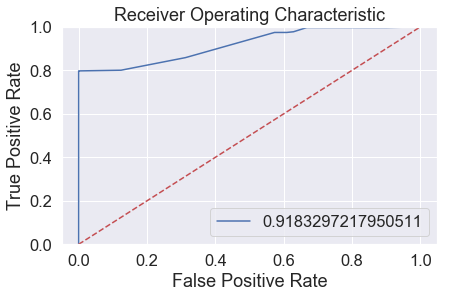

In [214]:
#ROC curve
import matplotlib.pyplot as plt 
#%matplotlib inline 
plt.title('Receiver Operating Characteristic') 
plt.plot(fpr, tpr, 'b', label = auc) 
plt.legend(loc = 'lower right') 
plt.plot([0, 1], [0, 1],'r--') 
#plt.xlim([0, 1]) 
plt.ylim([0, 1]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate')
plt.show()

# Random Forest Model

In [215]:
from sklearn.ensemble import RandomForestClassifier
# Create random tree classifer object
clf_RF = RandomForestClassifier(random_state=10,min_samples_leaf=100,max_depth=10,criterion='gini')
clf_RF.fit(Model_X_train,Model_y_train)
predictions = clf_RF.predict(Model_X_test)
cfm = confusion_matrix(Model_y_test, predictions)
print(cfm)
print(classification_report(Model_y_test, predictions))
print(accuracy_score(Model_y_test, predictions))


[[256667     13]
 [    63    248]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.95      0.80      0.87       311

    accuracy                           1.00    256991
   macro avg       0.97      0.90      0.93    256991
weighted avg       1.00      1.00      1.00    256991

0.9997042697993315


### Cross-Validation

In [216]:
acc=cross_val_score(estimator=clf_RF,X=Model_X_train,y=Model_y_train,cv=10)
acc.mean()

0.9958445826728857

In [217]:
confusion = metrics.confusion_matrix(Model_y_test, predictions)
print(confusion)
#[row, column]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]

[[256667     13]
 [    63    248]]


In [218]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print(classification_error)

0.0002957302006685059


#### SENSITIVITY

In [219]:
print(metrics.recall_score(Model_y_test, predictions))

0.797427652733119


#### SPECIFICITY => True Negative Rate (TNR)

In [220]:
specificity = TN / (TN + FP)
print(specificity)

0.9999493532803491


#### Positive Rate

In [221]:
false_positive_rate = FP / float(TN + FP)
print(false_positive_rate)

5.0646719650927225e-05


#### PRECISION

In [222]:
print(metrics.precision_score(Model_y_test, predictions))

0.9501915708812261


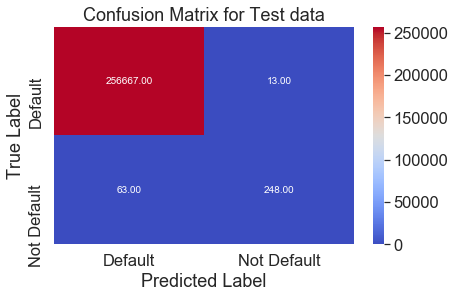

In [223]:
sns.heatmap(cfm,annot=True, fmt=".2f", cmap="coolwarm",
            xticklabels = ["Default", "Not Default"] , yticklabels = ["Default", "Not Default"])
plt.title("Confusion Matrix for Test data")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [224]:
predictions_prob= clf_RF.predict_proba(Model_X_test)
print(predictions_prob)

[[0.67687491 0.32312509]
 [0.7195024  0.2804976 ]
 [0.79772257 0.20227743]
 ...
 [0.99726843 0.00273157]
 [0.99798329 0.00201671]
 [0.99095798 0.00904202]]


In [225]:
from sklearn import metrics
fpr , tpr , z = metrics.roc_curve(Model_y_test , prediction_prob[:,1])
auc = metrics.auc(fpr,tpr)
print(auc)
print(fpr)
print(tpr)

0.9000490933698522
[0.         0.         0.         ... 0.99985196 0.99985975 1.        ]
[0.         0.33440514 0.35691318 ... 1.         1.         1.        ]


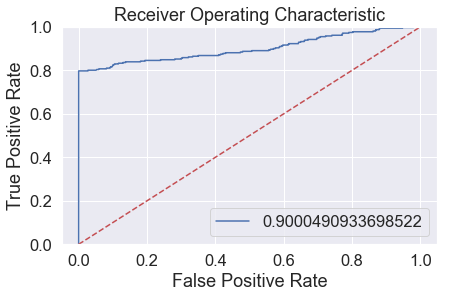

In [226]:
#ROC curve
import matplotlib.pyplot as plt 
#%matplotlib inline 
plt.title('Receiver Operating Characteristic') 
plt.plot(fpr, tpr, 'b', label = auc) 
plt.legend(loc = 'lower right') 
plt.plot([0, 1], [0, 1],'r--') 
#plt.xlim([0, 1]) 
plt.ylim([0, 1]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate')
plt.show()

# Gradient Boosting Classifier

In [227]:
from sklearn.ensemble import GradientBoostingClassifier

model_GradientBoosting=GradientBoostingClassifier()

#fit the model on the data and predict the values
model_GradientBoosting.fit(Model_X_train,Model_y_train)

Y_pred=model_GradientBoosting.predict(Model_X_test)

#checking result
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
#confusion_matrix
cfm=confusion_matrix(Model_y_test,Y_pred)
print(cfm)
#classification_report
print("Classification report: ")
print(classification_report(Model_y_test,Y_pred))
#accuracy_score
acc=accuracy_score(Model_y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[139230 117450]
 [     4    307]]
Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.54      0.70    256680
           1       0.00      0.99      0.01       311

    accuracy                           0.54    256991
   macro avg       0.50      0.76      0.35    256991
weighted avg       1.00      0.54      0.70    256991

Accuracy of the model:  0.5429645396142277


In [228]:
confusion = metrics.confusion_matrix(Model_y_test, Y_pred)
print(confusion)
#[row, column]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]

[[139230 117450]
 [     4    307]]


#### SENSITIVITY

In [229]:
sensitivity = TP / float(FN + TP)

print(sensitivity)

0.9871382636655949


#### SPECIFICITY

In [230]:
specificity = TN / (TN + FP)
print(specificity)

0.5424263674614306


#### FALSE POSITIVR RATE

In [231]:
false_positive_rate = FP / float(TN + FP)
print(false_positive_rate)

0.4575736325385694


#### PRECISION

In [232]:
print(metrics.precision_score(Model_y_test, Y_pred))

0.0026070636989733095


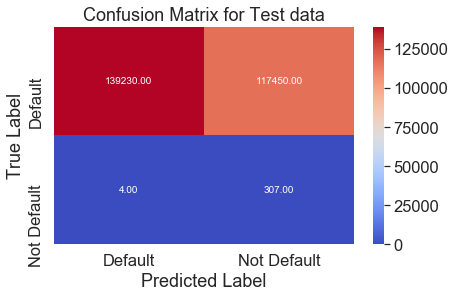

In [233]:
sns.heatmap(cfm,annot=True, fmt=".2f", cmap="coolwarm",
            xticklabels = ["Default", "Not Default"] , yticklabels = ["Default", "Not Default"])
plt.title("Confusion Matrix for Test data")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [234]:
from sklearn import metrics
fpr , tpr , z = metrics.roc_curve(Model_y_test , Y_pred)
auc = metrics.auc(fpr,tpr)
print(auc)
print(fpr)
print(tpr)

0.7647823155635128
[0.         0.45757363 1.        ]
[0.         0.98713826 1.        ]


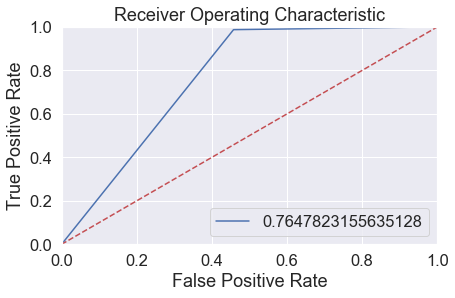

In [235]:
#ROC curve
import matplotlib.pyplot as plt 
#%matplotlib inline 
plt.title('Receiver Operating Characteristic') 
plt.plot(fpr, tpr, 'b', label = auc) 
plt.legend(loc = 'lower right') 
plt.plot([0, 1], [0, 1],'r--') 
plt.xlim([0, 1]) 
plt.ylim([0, 1]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate')
plt.show()

In [236]:
seed = 7
scoring = 'accuracy'

In [237]:
# Spot Check Algorithms
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
models = []
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier(random_state=10,min_samples_leaf=100,max_depth=25,criterion='gini')))
models.append(('RF', RandomForestClassifier(random_state=10,min_samples_leaf=100,max_depth=10,criterion='gini')))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    #kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, Model_X_train, Model_y_train.values.ravel(), cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.996427 (0.001489)
DT: 0.996666 (0.000897)
RF: 0.995581 (0.002416)


#### Comparing Algorithms

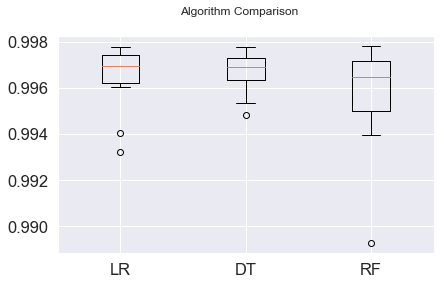

In [238]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()